### Install pycma
Install pccma if you don't install it previously,and want to try the code in section ***"Using CMA-ES to find the hyperparameters of my CNN model architecture"*** below.

In [1]:
!pip install cma

from google.colab import drive

drive.mount('/content/gdrive')

In [4]:
#change dir to your project folder
root_path = './'
# project_path = root_path + 'CarND-Traffic-Sign-Classifier-Project/'
project_path = root_path
data_path = project_path + 'data/'
model_path = project_path + 'model/'
image_path = project_path + 'images/' 

## Traffic Sign Classifier Project

In this project, you will use what you've learned about deep neural networks and convolutional neural networks to classify traffic signs. Specifically, you'll train a model to classify traffic signs from the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset). 

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [2]:
import numpy as np
import cv2

y_top = 5
y_bottom = 28
x_left = 5
x_right = 28
shift = 2

def get_perspective_matrix_v1():
    src = np.float32([[x_left, y_bottom],
                      [x_left, y_top],
                      [x_right, y_bottom],
                      [x_right, y_top]])

    dst = np.float32([[x_left + shift, y_bottom + shift],
                      [x_left + shift, y_top - shift],
                      [x_right + shift, y_bottom - shift],
                      [x_right + shift, y_top + shift]])

    M = cv2.getPerspectiveTransform(src, dst)
    return M

def get_perspective_matrix_v2():
    src = np.float32([[x_left, y_bottom],
                      [x_left, y_top],
                      [x_right, y_bottom],
                      [x_right, y_top]])

    dst = np.float32([[x_left - shift, y_bottom - shift],
                      [x_left - shift, y_top + shift],
                      [x_right - shift, y_bottom + shift],
                      [x_right - shift, y_top - shift]])

    M = cv2.getPerspectiveTransform(src, dst)
    return M

def get_perspective_matrix_v3():
    src = np.float32([[x_left, y_bottom],
                      [x_left, y_top],
                      [x_right, y_bottom],
                      [x_right, y_top]])

    dst = np.float32([[x_left - shift, y_bottom + shift],
                      [x_left + shift, y_top + shift],
                      [x_right + shift, y_bottom + shift],
                      [x_right - shift, y_top + shift]])

    M = cv2.getPerspectiveTransform(src, dst)
    return M

def get_perspective_matrix_v4():
    src = np.float32([[x_left, y_bottom],
                      [x_left, y_top],
                      [x_right, y_bottom],
                      [x_right, y_top]])

    dst = np.float32([[x_left + shift, y_bottom + shift],
                      [x_left - shift, y_top + shift],
                      [x_right - shift, y_bottom + shift],
                      [x_right + shift, y_top + shift]])

    M = cv2.getPerspectiveTransform(src, dst)
    return M

def get_perspective_matrix_v5():
    src = np.float32([[x_left, y_bottom],
                      [x_left, y_top],
                      [x_right, y_bottom],
                      [x_right, y_top]])

    dst = np.float32([[x_left - shift, y_bottom + shift],
                      [x_left - shift, y_top - shift],
                      [x_right + shift, y_bottom + shift],
                      [x_right + shift, y_top - shift]])

    M = cv2.getPerspectiveTransform(src, dst)
    return M

def get_perspective_matrix_v6():
    src = np.float32([[x_left, y_bottom],
                      [x_left, y_top],
                      [x_right, y_bottom],
                      [x_right, y_top]])

    dst = np.float32([[x_left + shift, y_bottom - shift],
                      [x_left + shift, y_top + shift],
                      [x_right - shift, y_bottom - shift],
                      [x_right - shift, y_top + shift]])

    M = cv2.getPerspectiveTransform(src, dst)
    return M

def perspective_transform(images, M):
    # img = np.copy(image)
    perspective_imgs = np.zeros_like(images)
    for idx in range(images.shape[0]):
        image = images[idx]
        perspective_imgs[idx,:,:,:] = cv2.warpPerspective(image, M, dsize=(image.shape[1], image.shape[0]), flags=cv2.INTER_LINEAR)
    return perspective_imgs

def gauss_noise(img, mean=0, var=1.0, min=0.0, max=255.0):
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, img.shape)
    gauss = gauss.reshape(img.shape)
    noisy = img + gauss
    noisy = np.clip(noisy, min, max)
    return noisy

def noisy(images, mean=0, var=1.0, min=0.0, max=255.0):
    noisy_imgs = np.zeros_like(images)
    for idx in range(images.shape[0]):
        noisy_imgs[idx,:,:,:] = gauss_noise(images[idx], mean, var, min, max)
    return noisy_imgs

M1 = get_perspective_matrix_v1()
M2 = get_perspective_matrix_v2()
M3 = get_perspective_matrix_v3()
M4 = get_perspective_matrix_v4()
M5 = get_perspective_matrix_v5()
M6 = get_perspective_matrix_v6()

---
## Step 0: Load The Data

In [5]:
# Load pickled data
import pickle
import csv

# TODO: Fill this in based on where you saved the training and testing data
training_file = data_path + 'train.p'
validation_file = data_path + 'valid.p'
testing_file = data_path + 'test.p'
signnames_file = project_path + 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(signnames_file, mode='r') as f:
    signnames_csv = csv.reader(f)
    signnames = {}
    for row in signnames_csv:
        if row[0] != 'ClassId':
            signnames[row[0]] = row[1]
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
X_train_M1 = perspective_transform(X_train, M1)
X_train_M2 = perspective_transform(X_train, M2)
X_train_M3 = perspective_transform(X_train, M3)
X_train_M4 = perspective_transform(X_train, M4)
X_train_M5 = perspective_transform(X_train, M5)
X_train_M6 = perspective_transform(X_train, M6)
X_train_extend = np.concatenate((X_train, X_train_M1, X_train_M2, X_train_M3, X_train_M4, X_train_M5, X_train_M6), axis=0)
y_train_extend = np.concatenate((y_train, y_train, y_train, y_train, y_train, y_train, y_train), axis=0)

class_id = {}
class_extend_id = {}
for id in range(len(signnames)):
    class_id[id] = np.where(y_train == id)[0]
    class_extend_id[id] = np.where(y_train_extend == id)[0]

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]
n_train_extend = X_train_extend.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(signnames)

print("Number of training examples =", n_train)
print("Number of extend training examples =", n_train_extend)
print("Number of validating examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of extend training examples = 243593
Number of validating examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import cma
import sys
import math
import glob

# Visualizations will be shown in the notebook.
%matplotlib inline

### Show traffic sign by each class

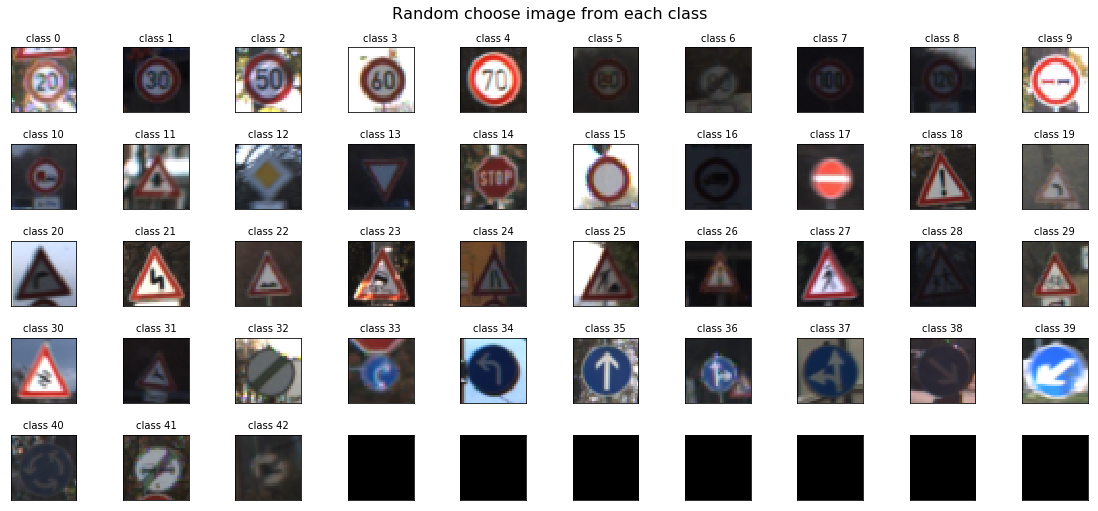

In [7]:
id = 0
f, axis = plt.subplots(5, 10, figsize=(15, 7))
f.tight_layout()
f.suptitle('Random choose image from each class', fontsize=16)
empty = np.zeros(shape=image_shape)
for row in range(5):
    for col in range(10):
        if id < n_classes:
            idx = class_id[id][np.random.randint(0, len(class_id[id]))]
            # y_gray = cv2.cvtColor(X_train[idx], cv2.COLOR_RGB2YUV)[:,:,0]
            axis[row][col].imshow(X_train[idx])
            axis[row][col].set_title('class {}'.format(id), fontsize=10)
            id += 1
        else:
            axis[row][col].imshow(empty)
        axis[row][col].get_xaxis().set_visible(False)
        axis[row][col].get_yaxis().set_visible(False)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()
plt.close()

### The distribution of training data set

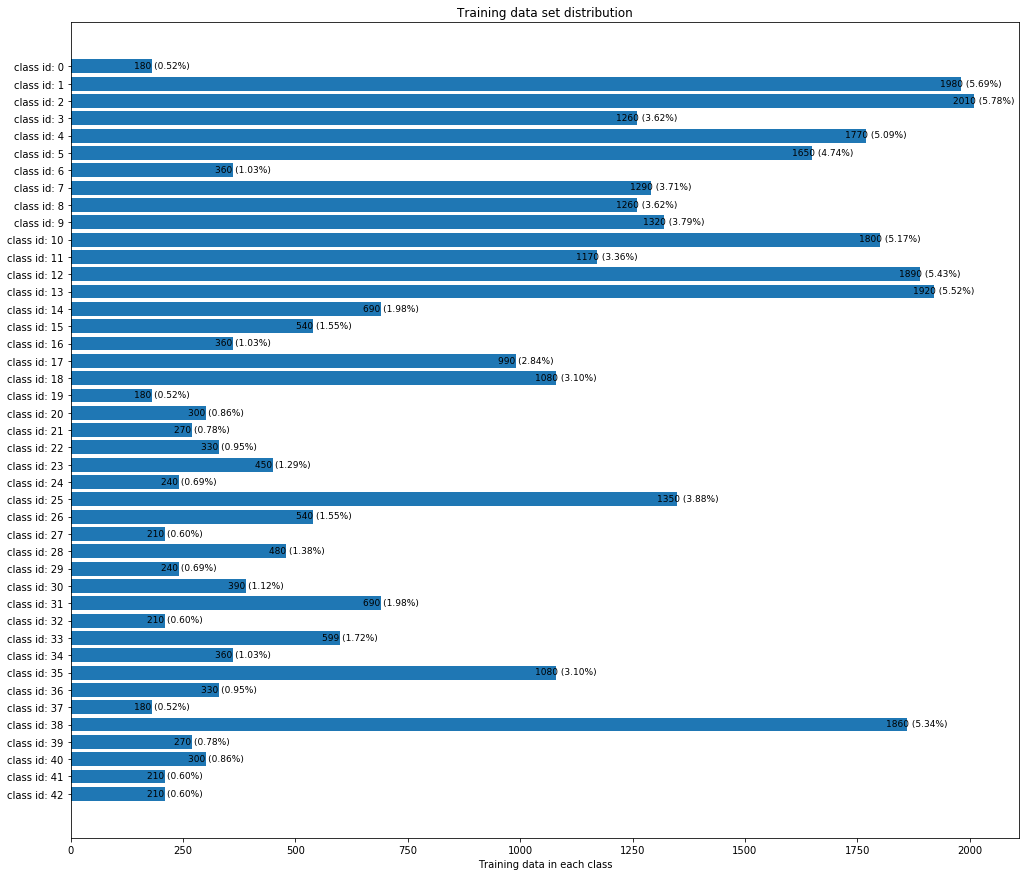

In [8]:
def class_autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    total_percent = 0
    for rect in rects:
        height = rect.get_height()
        width = rect.get_width()
        plt.annotate('{} ({:>4.2f}%)'.format(width, width/len(y_train)*100),
                    xy=(width, rect.get_y() + height / 2),
                    xytext=(10, -4),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

fig, ax = plt.subplots(figsize=(17, 15))
x_label = []
class_count = []
total = 0
for id in range(n_classes):
    x_label.append('class id: {}'.format(id))
    class_count.append(len(class_id[id]))
    total += len(class_id[id])

rects = ax.barh(np.arange(n_classes), class_count, align='center')
class_autolabel(rects)
ax.set_yticks(np.arange(n_classes))
ax.set_yticklabels(x_label)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Training data in each class')
ax.set_title('Training data set distribution')

plt.show()
plt.close()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
def yuv_gray_norm(data, add_noise=True):
    if data.shape == image_shape:
        # Single image case
        norm_data = cv2.cvtColor(data, cv2.COLOR_RGB2YUV)[:,:,0]
        if add_noise:
            norm_data = gauss_noise(norm_data, var=10.0)
        norm_data = (norm_data - np.min(norm_data)) / (np.max(norm_data) - np.min(norm_data))
        return norm_data
    else:
        # Batch data case
        norm_data = np.empty_like(data[...,:1])
        for i in range(data.shape[0]):
            norm_data[i,:,:,0] = cv2.cvtColor(data[i], cv2.COLOR_RGB2YUV)[:,:,0]
        if add_noise:
            norm_data = noisy(norm_data, var=10.0)
        norm_data = (norm_data - np.min(norm_data)) / (np.max(norm_data) - np.min(norm_data))
        return norm_data

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
X_train_norm = yuv_gray_norm(X_train)
X_train_no_noise_norm = yuv_gray_norm(X_train, add_noise=False)
X_train_extend_norm = yuv_gray_norm(X_train_extend)
X_train_extend_no_noise_norm = yuv_gray_norm(X_train_extend, add_noise=False)
X_valid_norm = yuv_gray_norm(X_valid, add_noise=False)
X_test_norm = yuv_gray_norm(X_test, add_noise=False)
print('X_train_norm shape: {}'.format(X_train_norm.shape))
print('X_train_norm, min: {}, max: {}'.format(np.min(X_train_norm[0]), np.max(X_train_norm[0])))

X_train_norm shape: (34799, 32, 32, 1)
X_train_norm, min: 0.06274509803921569, max: 0.43529411764705883


### Using perspective transform to increase training data set

I use *zoon in, zoon out, horizontal rotation* and *vertical rotation* to do the six types of image perspection transform. 

Here is the result:

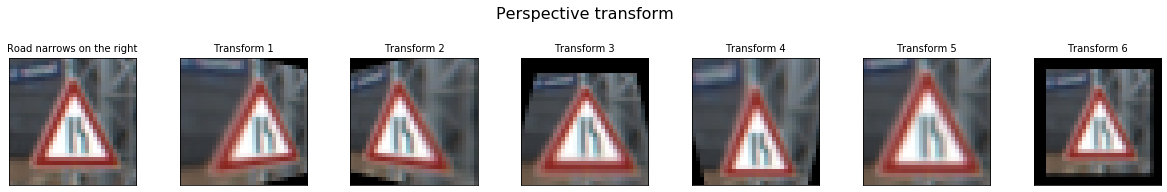

In [0]:
f, axis = plt.subplots(1, 7, figsize=(16, 3))
f.tight_layout()
f.suptitle('Perspective transform', fontsize=16)
sign01 = np.random.randint(0, n_train)
axis[0].imshow(X_train[sign01])
axis[0].set_title(signnames[str(y_train[sign01])], fontsize=10)
axis[1].imshow(X_train_M1[sign01])
axis[1].set_title('Transform 1', fontsize=10)
axis[2].imshow(X_train_M2[sign01])
axis[2].set_title('Transform 2', fontsize=10)
axis[3].imshow(X_train_M3[sign01])
axis[3].set_title('Transform 3', fontsize=10)
axis[4].imshow(X_train_M4[sign01])
axis[4].set_title('Transform 4', fontsize=10)
axis[5].imshow(X_train_M5[sign01])
axis[5].set_title('Transform 5', fontsize=10)
axis[6].imshow(X_train_M6[sign01])
axis[6].set_title('Transform 6', fontsize=10)
for i in range(7):
    axis[i].get_xaxis().set_visible(False)
    axis[i].get_yaxis().set_visible(False)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()
plt.close()

### Image preprocess
My image preprocessing step is:
1. Convert image from `RGB color space` to `YUV color space`
2. Extract *Y channel* from `YUV color space`
3. Normalize *Y channel* accroading to formula: $$ new\_pixel = \frac{pixel - min(image)}{max(image) - min(image)} $$

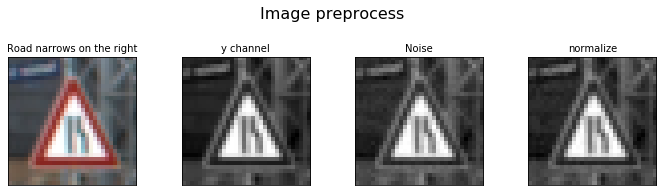

In [0]:
f, axis = plt.subplots(1, 4, figsize=(9, 3))
f.tight_layout()
f.suptitle('Image preprocess', fontsize=16)

image01 = X_train[sign01]
yuv01 = cv2.cvtColor(image01, cv2.COLOR_RGB2YUV)[:,:,0]
yuv_noise01 = gauss_noise(yuv01, var=10.0)
norm01 = X_train_norm[sign01].reshape(yuv01.shape)

axis[0].imshow(image01)
axis[0].set_title(signnames[str(y_train[sign01])], fontsize=10)
axis[1].imshow(yuv01, cmap='gray')
axis[1].set_title('y channel', fontsize=10)
axis[2].imshow(yuv_noise01, cmap='gray')
axis[2].set_title('Noise', fontsize=10)
axis[3].imshow(norm01, cmap='gray')
axis[3].set_title('normalize', fontsize=10)
for i in range(4):
    axis[i].get_xaxis().set_visible(False)
    axis[i].get_yaxis().set_visible(False)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()
plt.close()

## Implement Convolution Neural Network

### Model Architecture

In [10]:
# Define Lenet-5 hyperparameters
lenet_hyperparameter = {
    'EPOCHS': 50,
    'BATCH_SIZE': 128,
    'RATE': 0.001,
    'input_shape': [32, 32, 1],
    'use_bn': True,
    'use_dropout': True,
    'c1_size': 5,
    'c1_depth': 6,
    'c1_stride': 1,
    'c3_size': 5,
    'c3_depth': 16,
    'c3_stride': 1,
    'c5_size': 120,
    'f6_size': 84,
    # 'c1_dropout_rate': 0.5,
    # 'c3_dropout_rate': 0.5,
    'c5_dropout_rate': 0.5,
    'f6_dropout_rate': 0.5,
}

In [11]:
class ConvNet:
    def __init__(self, hyperparameters):
        self.mu = 0
        self.sigma = 0.1
        self.epochs = hyperparameters['EPOCHS']
        self.batch_size = hyperparameters['BATCH_SIZE']
        self.rate = hyperparameters['RATE']
        self.weights = None
        self.biases = None
        
        # Network architectures
        self.hyperparameters = hyperparameters
        # Tenserflow operation
        self.x = None
        self.y = None
        # self.c1_dropout_rate = None
        # self.c3_dropout_rate = None
        self.c5_dropout_rate = None
        self.f6_dropout_rate = None
        self.on_training = None
        self.train_op = None
        self.accuracy_op = None
        self.softmax_op = None
        self.saver = None
        self.train_acc = None
        self.valid_acc = None

    def build_cnn(self):
        # Read network architecture parameters
        input_shape = self.hyperparameters['input_shape']
        use_bn = self.hyperparameters['use_bn']
        use_dropout = self.hyperparameters['use_dropout']
        c1_size = self.hyperparameters['c1_size']
        c1_depth = self.hyperparameters['c1_depth']
        c1_stride = self.hyperparameters['c1_stride']

        c3_size = self.hyperparameters['c3_size']
        c3_depth = self.hyperparameters['c3_depth']
        c3_stride = self.hyperparameters['c3_stride']

        c5_size = self.hyperparameters['c5_size']
        f6_size = self.hyperparameters['f6_size']

        # Arguments used for tf.random_normal, randomly defines
        # variables for the weights and biases for each layer
        mu = self.mu
        sigma = self.sigma
        bn_epsilon = 0.001
        # Input
        self.x = tf.placeholder(tf.float32, [None] + list(input_shape))
        self.y = tf.placeholder(tf.int32, (None))
        # self.c1_dropout_rate = tf.placeholder_with_default(0.0, shape=())
        # self.c3_dropout_rate = tf.placeholder_with_default(0.0, shape=())
        self.c5_dropout_rate = tf.placeholder_with_default(0.0, shape=())
        self.f6_dropout_rate = tf.placeholder_with_default(0.0, shape=())
        self.on_training = tf.placeholder_with_default(False, shape=())
        one_hot_y = tf.one_hot(self.y, n_classes)
        ema = tf.train.ExponentialMovingAverage(decay=0.999)

        # C1 Layer: Convolutional. Input = 32x32x1. Output = 28x28x6.
        c1_w = tf.Variable(tf.random_normal(shape=[c1_size, c1_size, input_shape[2], c1_depth], mean=mu, stddev=sigma))
        
        # C1 batch normalization
        if use_bn == True:
            c1 = tf.nn.conv2d(self.x, filter=c1_w, strides=[1, c1_stride, c1_stride, 1], padding='VALID', name='c1')
            # print('c1 shape: {}'.format(c1.get_shape()))
            c1_pop_mean = tf.Variable(tf.zeros([c1.get_shape()[-1]]), trainable=False)
            c1_pop_var = tf.Variable(tf.ones([c1.get_shape()[-1]]), trainable=False)
            c1_batch_mean, c1_batch_var = tf.nn.moments(c1, axes=[0, 1, 2])
            def mean_var_with_pop_update():
                update_mean_var = ema.apply([c1_batch_mean, c1_batch_var])
                with tf.control_dependencies([update_mean_var]):
                    return tf.identity(c1_batch_mean), tf.identity(c1_batch_var)
            def get_pop_mean_var():
                return ema.average(c1_batch_mean), ema.average(c1_batch_var)

            c1_bn_mean, c1_bn_var = tf.cond(self.on_training, mean_var_with_pop_update, get_pop_mean_var)
            c1_bn_offset = tf.Variable(tf.zeros(c1.get_shape()[-1]))
            c1_bn_scale = tf.Variable(tf.ones(c1.get_shape()[-1]))
            c1 = tf.nn.batch_normalization(c1, c1_bn_mean, c1_bn_var, c1_bn_offset, c1_bn_scale, bn_epsilon)
        else:
            c1_b = tf.Variable(tf.random_normal(shape=[c1_depth,], mean=mu, stddev=sigma))
            c1 = tf.nn.conv2d(self.x, filter=c1_w, strides=[1, c1_stride, c1_stride, 1], padding='VALID', name='c1') + c1_b
        
        # C1 Activation.
        c1 = tf.nn.relu(c1, name='c1_relu')
        # print('c1_relu shape: {}'.format(c1.get_shape()))

        # S2 max pooling. Input = 28x28x6. Output = 14x14x6.
        s2 = tf.nn.max_pool(c1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='s2')
        # print('s2 shape: {}'.format(s2.get_shape()))

        # C3 Layer: Convolutional. Output = 10x10x16.
        c3_w = tf.Variable(tf.random_normal(shape=[c3_size, c3_size, c1_depth, c3_depth], mean=mu, stddev=sigma))
        
        # C3 batch normalization
        if use_bn == True:
            c3 = tf.nn.conv2d(s2, filter=c3_w, strides=[1, c3_stride, c3_stride, 1], padding='VALID', name='c3')
            # print('c3 shape: {}'.format(c3.get_shape()))
            c3_pop_mean = tf.Variable(tf.zeros([c3.get_shape()[-1]]), trainable=False)
            c3_pop_var = tf.Variable(tf.ones([c3.get_shape()[-1]]), trainable=False)
            c3_batch_mean, c3_batch_var = tf.nn.moments(c3, axes=[0, 1, 2])
            def mean_var_with_pop_update():
                update_mean_var = ema.apply([c3_batch_mean, c3_batch_var])
                with tf.control_dependencies([update_mean_var]):
                    return tf.identity(c3_batch_mean), tf.identity(c3_batch_var)
            def get_pop_mean_var():
                return ema.average(c3_batch_mean), ema.average(c3_batch_var)

            c3_bn_mean, c3_bn_var = tf.cond(self.on_training, mean_var_with_pop_update, get_pop_mean_var)
            c3_bn_offset = tf.Variable(tf.zeros(c3.get_shape()[-1]))
            c3_bn_scale = tf.Variable(tf.ones(c3.get_shape()[-1]))
            c3 = tf.nn.batch_normalization(c3, c3_bn_mean, c3_bn_var, c3_bn_offset, c3_bn_scale, bn_epsilon)
        else:
            c3_b = tf.Variable(tf.random_normal(shape=[c3_depth,], mean=mu, stddev=sigma))
            c3 = tf.nn.conv2d(s2, filter=c3_w, strides=[1, c3_stride, c3_stride, 1], padding='VALID', name='c3') + c3_b
        
        # C3 Activation.
        c3 = tf.nn.relu(c3, name='c3_relu')
        # print('c3_relu shape: {}'.format(c3.get_shape()))
        
        # S4 max pooling. Input = 10x10x16. Output = 5x5x16.
        s4 = tf.nn.max_pool(c3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='s4')
        # print('s4 shape: {}'.format(s4.get_shape()))

        # S4 flatten. Input = 5x5x16. Output = 400.
        # s4 = tf.contrib.layers.flatten(s4)
        s4_flatten = tf.contrib.layers.flatten(s4)
        s2_flatten = tf.contrib.layers.flatten(s2)
        s4_concate = tf.concat([s4_flatten, s2_flatten], axis=1)
        # print('s4 flatten shape: {}'.format(s4.get_shape()))
        
        # C5 Layer: Fully Connected. Input = 400. Output = 120.
        c5_w = tf.Variable(tf.random_normal(shape=[s4_concate.get_shape().as_list()[1], c5_size], mean=mu, stddev=sigma))
        
        # C5 batch normalization
        if use_bn == True:
            c5 = tf.matmul(s4_concate, c5_w, name='c5')
            # print('c5 shape: {}'.format(c5.get_shape()))
            c5_pop_mean = tf.Variable(tf.zeros([c5.get_shape()[-1]]), trainable=False)
            c5_pop_var = tf.Variable(tf.ones([c5.get_shape()[-1]]), trainable=False)
            c5_batch_mean, c5_batch_var = tf.nn.moments(c5, axes=[0])
            def mean_var_with_pop_update():
                update_mean_var = ema.apply([c5_batch_mean, c5_batch_var])
                with tf.control_dependencies([update_mean_var]):
                    return tf.identity(c5_batch_mean), tf.identity(c5_batch_var)
            def get_pop_mean_var():
                return ema.average(c5_batch_mean), ema.average(c5_batch_var)

            c5_bn_mean, c5_bn_var = tf.cond(self.on_training, mean_var_with_pop_update, get_pop_mean_var)
            c5_bn_offset = tf.Variable(tf.zeros(c5.get_shape()[-1]))
            c5_bn_scale = tf.Variable(tf.ones(c5.get_shape()[-1]))
            c5 = tf.nn.batch_normalization(c5, c5_bn_mean, c5_bn_var, c5_bn_offset, c5_bn_scale, bn_epsilon)
        else:
            c5_b = tf.Variable(tf.random_normal(shape=[c5_size,], mean=mu, stddev=sigma))
            c5 = tf.add(tf.matmul(s4_concate, c5_w), c5_b, name='c5')
        
        # C5 Activation.
        c5 = tf.nn.relu(c5, name='c5_relu')

        # C5 dropout
        if use_dropout == True:
            # c5 = tf.nn.dropout(c5, rate=self.c5_dropout_rate, name='c5_dropout')
            c5 = tf.nn.dropout(c5, keep_prob=tf.subtract(1.0, self.c5_dropout_rate), name='c5_dropout')
        # print('c5_dropout shape: {}'.format(c5.get_shape()))

        # F6 Layer: Fully Connected. Input = 120. Output = 84.
        f6_w = tf.Variable(tf.random_normal(shape=[c5_size, f6_size], mean=mu, stddev=sigma))
        
        # F6 batch normalization
        if use_bn == True:
            f6 = tf.matmul(c5, f6_w, name='f6')
            # print('f6 shape: {}'.format(f6.get_shape()))
            f6_pop_mean = tf.Variable(tf.zeros([f6.get_shape()[-1]]), trainable=False)
            f6_pop_var = tf.Variable(tf.ones([f6.get_shape()[-1]]), trainable=False)
            f6_batch_mean, f6_batch_var = tf.nn.moments(f6, axes=[0])
            def mean_var_with_pop_update():
                update_mean_var = ema.apply([f6_batch_mean, f6_batch_var])
                with tf.control_dependencies([update_mean_var]):
                    return tf.identity(f6_batch_mean), tf.identity(f6_batch_var)
            def get_pop_mean_var():
                return ema.average(f6_batch_mean), ema.average(f6_batch_var)

            f6_bn_mean, f6_bn_var = tf.cond(self.on_training, mean_var_with_pop_update, get_pop_mean_var)
            f6_bn_offset = tf.Variable(tf.zeros(f6.get_shape()[-1]))
            f6_bn_scale = tf.Variable(tf.ones(f6.get_shape()[-1]))
            f6 = tf.nn.batch_normalization(f6, f6_bn_mean, f6_bn_var, f6_bn_offset, f6_bn_scale, bn_epsilon)
        else:
            f6_b = tf.Variable(tf.random_normal(shape=[f6_size,], mean=mu, stddev=sigma))
            f6 = tf.add(tf.matmul(c5, f6_w), f6_b, name='f6')
        # print('f6 shape: {}'.format(f6.get_shape()))
        
        # F6 Activation.
        f6 = tf.nn.relu(f6, name='f6_relu')

        # F6 dropout
        if use_dropout == True:
            # f6 = tf.nn.dropout(f6, rate=self.f6_dropout_rate, name='f6_dropout')
            f6 = tf.nn.dropout(f6, keep_prob=tf.subtract(1.0, self.f6_dropout_rate), name='f6_dropout')

        # Output Layer: Fully Connected. Input = 84. Output = n_classes.
        out_w = tf.Variable(tf.random_normal(shape=[f6_size, n_classes], mean=mu, stddev=sigma))
        out_b = tf.Variable(tf.random_normal(shape=[n_classes,], mean=mu, stddev=sigma))
        logits = tf.add(tf.matmul(f6, out_w), out_b, name='output')
        self.softmax_op = tf.nn.softmax(logits, name='softmax')
        # print('logits shape: {}'.format(logits.get_shape()))

        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
        loss_operation = tf.reduce_mean(cross_entropy)
        optimizer = tf.train.AdamOptimizer(learning_rate = self.rate)
        self.train_op = optimizer.minimize(loss_operation)

        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        self.accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        self.saver = tf.train.Saver()

        return c1, c3
        
    def train(self, sess, X_train, y_train,
              use_valid=False, X_valid=None, y_valid=None,
              auto_save=False, save_name='cnn', dropout=[0.5, 0.5]):
        EPOCHS = self.epochs
        BATCH_SIZE = self.batch_size
        num_examples = len(X_train)
        best_validation_accuracy = -1.0
        self.train_acc = []
        self.valid_acc = []

        # print("Training...")
        # print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(self.train_op,
                         feed_dict={self.x: batch_x,
                                    self.y: batch_y,
                                    # self.c1_dropout_rate: dropout[0],
                                    # self.c3_dropout_rate: dropout[1],
                                    self.c5_dropout_rate: dropout[0],
                                    self.f6_dropout_rate: dropout[1],
                                    self.on_training: True})

            if i % 10 == 0 and i > 0:
                if use_valid == True:
                    validation_accuracy, _ = self.evaluate(sess, X_valid, y_valid)
                    self.valid_acc.append(validation_accuracy)
                    filename = save_name + '_{:0>3d}'.format(i+1)
                    # print('save as: {}'.format(model_path + filename))
                    self.saver.save(sess, model_path + filename)
                    print("EPOCH {}, Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
                train_accuracy, _ = self.evaluate(sess, X_train, y_train)
                self.train_acc.append(train_accuracy)

        if auto_save == True:
            filename = save_name + '_final'
            self.saver.save(sess, model_path + filename)
            print("Model saved as: {}".format(model_path + filename))
        # print('train accuracy: {}'.format(self.train_acc))
        # print('valid accuracy: {}'.format(self.valid_acc))

    def evaluate(self, sess, X_data, y_data):
        EPOCHS = self.epochs
        BATCH_SIZE = self.batch_size
        
        num_examples = len(X_data)
        total_accuracy = 0
        final_softmax = np.zeros(shape=(y_data.shape[0], n_classes))
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy, softmax = sess.run([self.accuracy_op, self.softmax_op], 
                                         feed_dict={self.x: batch_x,
                                                    self.y: batch_y,
                                                    self.on_training: False})
            final_softmax[offset:offset+BATCH_SIZE] = softmax
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples, final_softmax
    
    def load_weights(self, sess, filename):
        print('load model from: {}'.format(model_path + filename))
        self.saver.restore(sess, model_path + filename)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
train_acc_epochs = []
test_acc_epochs = []

### Train LeNet-5 with original training data set

Result:

EPOCH 11, Validation Accuracy = 0.883

EPOCH 21, Validation Accuracy = 0.902

EPOCH 31, Validation Accuracy = 0.903

EPOCH 41, Validation Accuracy = 0.906

Train Accuracy = 1.000

Test Accuracy = 0.914

In [22]:
print('Train LeNet-5 with original training data set:')
with tf.Graph().as_default(), tf.Session() as sess:
    lenet_hyperparameter['use_bn'] = False
    lenet_hyperparameter['use_dropout'] = False
    lenet_hyperparameter['EPOCHS'] = 50
    conv_net = ConvNet(lenet_hyperparameter)
    conv_net.build_cnn()
    sess.run(tf.global_variables_initializer())
    conv_net.train(sess, X_train_norm, y_train, True, X_test_norm, y_test)

    train_accuracy, _ = conv_net.evaluate(sess, X_train_norm, y_train)
    test_accuracy, _ = conv_net.evaluate(sess, X_test_norm, y_test)
    train_acc_epochs.append(conv_net.train_acc + [train_accuracy])
    test_acc_epochs.append(conv_net.valid_acc + [test_accuracy])
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Train LeNet-5 with original training data set:
EPOCH 11, Validation Accuracy = 0.886
EPOCH 21, Validation Accuracy = 0.900
EPOCH 31, Validation Accuracy = 0.910
EPOCH 41, Validation Accuracy = 0.917
train accuracy: [0.9883617345497298, 0.9941952354952729, 0.9976148739906319, 1.0]
valid accuracy: [0.8864608075160029, 0.8999208234268243, 0.9102137768259146, 0.917102137833291]
Train Accuracy = 1.000
Test Accuracy = 0.918


### Train LeNet-5 with original training data set without gauss noise

EPOCH 11, Validation Accuracy = 0.926

EPOCH 21, Validation Accuracy = 0.927

EPOCH 31, Validation Accuracy = 0.934

EPOCH 41, Validation Accuracy = 0.919

Train Accuracy = 1.000

Test Accuracy = 0.925

In [23]:
print('Train LeNet-5 with original training data set without gauss noise:')
with tf.Graph().as_default(), tf.Session() as sess:
    lenet_hyperparameter['use_bn'] = False
    lenet_hyperparameter['use_dropout'] = False
    lenet_hyperparameter['EPOCHS'] = 50
    conv_net = ConvNet(lenet_hyperparameter)
    conv_net.build_cnn()
    sess.run(tf.global_variables_initializer())
    conv_net.train(sess, X_train_no_noise_norm, y_train, True, X_test_norm, y_test)

    train_accuracy, _ = conv_net.evaluate(sess, X_train_no_noise_norm, y_train)
    test_accuracy, _ = conv_net.evaluate(sess, X_test_norm, y_test)
    train_acc_epochs.append(conv_net.train_acc + [train_accuracy])
    test_acc_epochs.append(conv_net.valid_acc + [test_accuracy])
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Train LeNet-5 with original training data set without gauss noise:
EPOCH 11, Validation Accuracy = 0.885
EPOCH 21, Validation Accuracy = 0.899
EPOCH 31, Validation Accuracy = 0.916
EPOCH 41, Validation Accuracy = 0.921
train accuracy: [0.9936779792522774, 0.9933044052990029, 0.9999137906261674, 1.0]
valid accuracy: [0.8852731592109632, 0.8991290577139442, 0.915518606407531, 0.9214568488765876]
Train Accuracy = 1.000
Test Accuracy = 0.924


### Train LeNet-5 with extended training data set

EPOCH 11, Validation Accuracy = 0.910

EPOCH 21, Validation Accuracy = 0.932

EPOCH 31, Validation Accuracy = 0.939

EPOCH 41, Validation Accuracy = 0.923

Train Accuracy = 0.997

Test Accuracy = 0.929

In [24]:
print('Train LeNet-5 with extended training data set:')
with tf.Graph().as_default(), tf.Session() as sess:
    lenet_hyperparameter['use_bn'] = False
    lenet_hyperparameter['use_dropout'] = False
    lenet_hyperparameter['EPOCHS'] = 50
    conv_net = ConvNet(lenet_hyperparameter)
    conv_net.build_cnn()
    sess.run(tf.global_variables_initializer())
    conv_net.train(sess, X_train_extend_norm, y_train_extend, True, X_test_norm, y_test)

    train_accuracy, _ = conv_net.evaluate(sess, X_train_extend_norm, y_train_extend)
    test_accuracy, _ = conv_net.evaluate(sess, X_test_norm, y_test)
    train_acc_epochs.append(conv_net.train_acc + [train_accuracy])
    test_acc_epochs.append(conv_net.valid_acc + [test_accuracy])
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Train LeNet-5 with extended training data set:
EPOCH 11, Validation Accuracy = 0.931
EPOCH 21, Validation Accuracy = 0.935
EPOCH 31, Validation Accuracy = 0.946
EPOCH 41, Validation Accuracy = 0.940
train accuracy: [0.992791254264285, 0.9949834354845993, 0.997421929201578, 0.9946796500720464]
valid accuracy: [0.9307996833975695, 0.9351543944031118, 0.9459224067787659, 0.940142517880797]
Train Accuracy = 0.998
Test Accuracy = 0.944


### Train LeNet-5 with extended training data set without gauss noise

EPOCH 11, Validation Accuracy = 0.930

EPOCH 21, Validation Accuracy = 0.942

EPOCH 31, Validation Accuracy = 0.946

EPOCH 41, Validation Accuracy = 0.942

Train Accuracy = 0.997

Test Accuracy = 0.938

In [25]:
print('Train LeNet-5 with extended training data set without gauss noise:')
with tf.Graph().as_default(), tf.Session() as sess:
    lenet_hyperparameter['use_bn'] = False
    lenet_hyperparameter['use_dropout'] = False
    lenet_hyperparameter['EPOCHS'] = 50
    conv_net = ConvNet(lenet_hyperparameter)
    conv_net.build_cnn()
    sess.run(tf.global_variables_initializer())
    conv_net.train(sess, X_train_extend_no_noise_norm, y_train_extend, True, X_test_norm, y_test)

    train_accuracy, _ = conv_net.evaluate(sess, X_train_extend_no_noise_norm, y_train_extend)
    test_accuracy, _ = conv_net.evaluate(sess, X_test_norm, y_test)
    train_acc_epochs.append(conv_net.train_acc + [train_accuracy])
    test_acc_epochs.append(conv_net.valid_acc + [test_accuracy])
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Train LeNet-5 with extended training data set without gauss noise:
EPOCH 11, Validation Accuracy = 0.928
EPOCH 21, Validation Accuracy = 0.940
EPOCH 31, Validation Accuracy = 0.936
EPOCH 41, Validation Accuracy = 0.944
train accuracy: [0.9945729146568251, 0.9989613823057313, 0.9948274375700451, 0.9990311708464529]
valid accuracy: [0.9280285035912611, 0.940380047534254, 0.9362628662576774, 0.9444180523226021]
Train Accuracy = 0.999
Test Accuracy = 0.948


### Using LeNet-5 model architecture, but add *dropout* and *batch normalization*

In [26]:
print('Batch normalization + Dropout:')
with tf.Graph().as_default(), tf.Session() as sess:
    # hyperparameter['c1_lrn_bias'] = 4
    lenet_hyperparameter['use_bn'] = True
    lenet_hyperparameter['use_dropout'] = True
    lenet_hyperparameter['EPOCHS'] = 50
    conv_net = ConvNet(lenet_hyperparameter)
    conv_net.build_cnn()
    sess.run(tf.global_variables_initializer())
    conv_net.train(sess, X_train_norm, y_train, True, X_test_norm, y_test)

    train_accuracy, _ = conv_net.evaluate(sess, X_train_norm, y_train)
    test_accuracy, _ = conv_net.evaluate(sess, X_test_norm, y_test)
    train_acc_epochs.append(conv_net.train_acc + [train_accuracy])
    test_acc_epochs.append(conv_net.valid_acc + [test_accuracy])
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

print('-------------------')
print('')
print('Only Dropout:')
with tf.Graph().as_default(), tf.Session() as sess:
    lenet_hyperparameter['use_bn'] = False
    lenet_hyperparameter['use_dropout'] = True
    lenet_hyperparameter['EPOCHS'] = 50
    conv_net = ConvNet(lenet_hyperparameter)
    conv_net.build_cnn()
    sess.run(tf.global_variables_initializer())
    conv_net.train(sess, X_train_norm, y_train, True, X_test_norm, y_test)

    train_accuracy, _ = conv_net.evaluate(sess, X_train_norm, y_train)
    test_accuracy, _ = conv_net.evaluate(sess, X_test_norm, y_test)
    train_acc_epochs.append(conv_net.train_acc + [train_accuracy])
    test_acc_epochs.append(conv_net.valid_acc + [test_accuracy])
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
print('-------------------')
print('')
print('Only Batch normalization:')
with tf.Graph().as_default(), tf.Session() as sess:
    lenet_hyperparameter['use_bn'] = True
    lenet_hyperparameter['use_dropout'] = False
    lenet_hyperparameter['EPOCHS'] = 50
    conv_net = ConvNet(lenet_hyperparameter)
    conv_net.build_cnn()
    sess.run(tf.global_variables_initializer())
    conv_net.train(sess, X_train_norm, y_train, True, X_test_norm, y_test)

    train_accuracy, _ = conv_net.evaluate(sess, X_train_norm, y_train)
    test_accuracy, _ = conv_net.evaluate(sess, X_test_norm, y_test)
    train_acc_epochs.append(conv_net.train_acc + [train_accuracy])
    test_acc_epochs.append(conv_net.valid_acc + [test_accuracy])
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Batch normalization + Dropout:
EPOCH 11, Validation Accuracy = 0.924
EPOCH 21, Validation Accuracy = 0.931
EPOCH 31, Validation Accuracy = 0.930
EPOCH 41, Validation Accuracy = 0.939
train accuracy: [0.9851432512942366, 0.9921836834563076, 0.9948274375871734, 0.9987068593925112]
valid accuracy: [0.9237529691494559, 0.9313539193437294, 0.9304038005788838, 0.9387965163727743]
Train Accuracy = 0.998
Test Accuracy = 0.936
-------------------

Only Dropout:
EPOCH 11, Validation Accuracy = 0.902
EPOCH 21, Validation Accuracy = 0.925
EPOCH 31, Validation Accuracy = 0.927
EPOCH 41, Validation Accuracy = 0.937
train accuracy: [0.9637920630759571, 0.985200724210125, 0.9913503261587977, 0.9958906865139803]
valid accuracy: [0.9019794142727614, 0.9254948536271815, 0.9273159143005395, 0.9372129848431899]
Train Accuracy = 0.996
Test Accuracy = 0.936
-------------------

Only Batch normalization:
EPOCH 11, Validation Accuracy = 0.887
EPOCH 21, Validation Accuracy = 0.902
EPOCH 31, Validation Accuracy 

### Show diagram

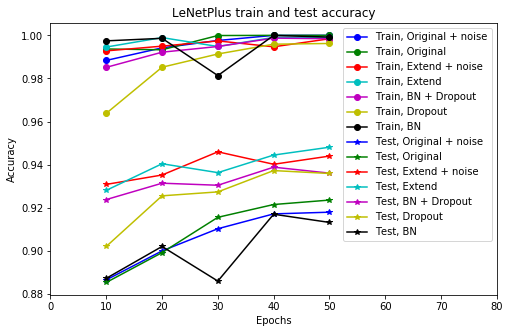

In [63]:
# print('train_acc_epochs: {}'.format(train_acc_epochs))
# print('test_acc_epochs: {}'.format(test_acc_epochs))
# with open(project_path + 'LeNetTrainAcc.pkl', 'wb') as f:
#     pickle.dump(train_acc_epochs, f)
# with open(project_path + 'LeNetTestAcc.pkl', 'wb') as f:
#     pickle.dump(test_acc_epochs, f)

f = plt.figure(figsize=(8, 5))

x = np.arange(1, len(test_acc_epochs[0]) + 1) * 10
y1 = np.array(train_acc_epochs[0])
y2 = np.array(train_acc_epochs[1])
y3 = np.array(train_acc_epochs[2])
y4 = np.array(train_acc_epochs[3])
y5 = np.array(train_acc_epochs[4])
y6 = np.array(train_acc_epochs[5])
y7 = np.array(train_acc_epochs[6])

plt.plot(x, y1, 'bo-', label='Train, Original + noise')
plt.plot(x, y2, 'go-', label='Train, Original')
plt.plot(x, y3, 'ro-', label='Train, Extend + noise')
plt.plot(x, y4, 'co-', label='Train, Extend')
plt.plot(x, y5, 'mo-', label='Train, BN + Dropout')
plt.plot(x, y6, 'yo-', label='Train, Dropout')
plt.plot(x, y7, 'ko-', label='Train, BN')

y1 = np.array(test_acc_epochs[0])
y2 = np.array(test_acc_epochs[1])
y3 = np.array(test_acc_epochs[2])
y4 = np.array(test_acc_epochs[3])
y5 = np.array(test_acc_epochs[4])
y6 = np.array(test_acc_epochs[5])
y7 = np.array(test_acc_epochs[6])
plt.plot(x, y1, 'b*-', label='Test, Original + noise')
plt.plot(x, y2, 'g*-', label='Test, Original')
plt.plot(x, y3, 'r*-', label='Test, Extend + noise')
plt.plot(x, y4, 'c*-', label='Test, Extend')
plt.plot(x, y5, 'm*-', label='Test, BN + Dropout')
plt.plot(x, y6, 'y*-', label='Test, Dropout')
plt.plot(x, y7, 'k*-', label='Test, BN')

plt.title('LeNetPlus train and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0, 80)
# plt.ylim(0.85, 1.03)
plt.legend()
plt.show()
plt.close()

### Tool function used to convert between CMA-ES solutions and hyperparameters

In [12]:
# Solution index and hyperparameters mapping
key2idx = {
    'c1_size': 0,
    'c1_depth': 1,
    'c3_size': 2,
    'c3_depth': 3,
    'c5_size': 4,
    'f6_size': 5,
    # 'c1_dropout_rate': 6,
    # 'c3_dropout_rate': 7,
    'c5_dropout_rate': 6,
    'f6_dropout_rate': 7,
}

# CMA-ES default solution and boundary
cma_es_nvars = len(key2idx)
init_solu = cma_es_nvars * [0.5]
lower_bounds = cma_es_nvars * [0.0]
upper_bounds = cma_es_nvars * [1.0]

def default_hyperparameter():
    hyperparameter = {
        'EPOCHS': 10,
        'BATCH_SIZE': 128,
        'RATE': 0.001,
        'input_shape': [32, 32, 1],
        'use_bn': True,
        'use_dropout': True,
        'c1_size': 6,
        'c1_depth': 16,
        'c1_stride': 1,
        'c3_size': 4,
        'c3_depth': 100,
        'c3_stride': 1,
        'c5_size': 449,
        'f6_size': 67,
        # 'c1_dropout_rate': 0.5,
        # 'c3_dropout_rate': 0.5,
        'c5_dropout_rate': 0.50772672,
        'f6_dropout_rate': 0.4694917,
        # 'c5_dropout_rate': 0.5,
        # 'f6_dropout_rate': 0.5,
    }
    return hyperparameter

def solution2hyperparameter(solution):
    hyperparameter = {
        'EPOCHS': 10,
        'BATCH_SIZE': 128,
        'RATE': 0.001,
        'input_shape': [32, 32, 1],
        'use_bn': True,
        'use_dropout': True,
        'c1_size': int(pow(2, 1 + 2 * solution[key2idx['c1_size']])), # id: 0, range: [2^1, 2^3] = [2, 8]
        'c1_depth': int(pow(2, 2 + 5 * solution[key2idx['c1_depth']])), # id: 1, range: [2^2, 2^7] = [4, 128]
        'c1_stride': 1,
        'c3_size': int(pow(2, 1 + 2 * solution[key2idx['c3_size']])), # id: 2, range: [2^1, 2^3] = [2, 8]
        'c3_depth': int(pow(2, 2 + 5 * solution[key2idx['c3_depth']])), # id: 3, range: [2^2, 2^7] = [4, 128]
        'c3_stride': 1,
        'c5_size': int(pow(2, 6 + 3 * solution[key2idx['c5_size']])), # id: 4, range: [2^6, 2^9] = [64, 512]
        'f6_size': int(pow(2, 6 + 3 * solution[key2idx['f6_size']])), # id: 5, range: [2^6, 2^9] = [64, 512]
        # 'c1_dropout_rate': solution[key2idx['c1_dropout_rate']], # id: 6, range: [0.0, 1.0], default: 0.5
        # 'c3_dropout_rate': solution[key2idx['c3_dropout_rate']], # id: 7, range: [0.0, 1.0], default: 0.5
        'c5_dropout_rate': solution[key2idx['c5_dropout_rate']], # id: 6, range: [0.0, 1.0], default: 0.5
        'f6_dropout_rate': solution[key2idx['f6_dropout_rate']], # id: 7, range: [0.0, 1.0], default: 0.5
        # 'c5_dropout_rate': 0.5,
        # 'f6_dropout_rate': 0.5,
    }
    return hyperparameter

def hyperparameter2solution(hyperparameter):
    solution = cma_es_nvars * [0.5]
    solution[key2idx['c1_size']] = (math.log(hyperparameter['c1_size'], 2) - 1) / 2.0
    solution[key2idx['c1_depth']] = (math.log(hyperparameter['c1_depth'], 2) - 2) / 5.0
    solution[key2idx['c3_size']] = (math.log(hyperparameter['c3_size'], 2) - 1) / 2.0
    solution[key2idx['c3_depth']] = (math.log(hyperparameter['c3_depth'], 2) - 2) / 5.0
    solution[key2idx['c5_size']] = (math.log(hyperparameter['c5_size'], 2) - 6) / 3.0
    solution[key2idx['f6_size']] = (math.log(hyperparameter['f6_size'], 2) - 6) / 3.0
    # solution[key2idx['c1_dropout_rate']] = hyperparameter['c1_dropout_rate']
    # solution[key2idx['c3_dropout_rate']] = hyperparameter['c3_dropout_rate']
    solution[key2idx['c5_dropout_rate']] = hyperparameter['c5_dropout_rate']
    solution[key2idx['f6_dropout_rate']] = hyperparameter['f6_dropout_rate']
    return solution

# Save and load CMA-ES optimization
def save_cme_es(optim):
    with open(project_path + 'saved-cma-es.pkl', 'wb') as f:
        pickle.dump(optim, f)
    
def load_cma_es():
    with open(project_path + 'saved-cma-es.pkl', 'rb') as f:
        optim = pickle.load(f)
    # print('best f-value =', test_optim.result[1])
    # print('best solution =', test_optim.result[0])
    return optim

def save_solutions(solutions):
    with open(project_path + 'cma_es_solutions.pkl', 'wb') as f:
        pickle.dump(solutions, f)
    
def load_solutions():
    with open(project_path + 'cma_es_solutions.pkl', 'rb') as f:
        solutions = pickle.load(f)
    return solutions

### Using CMA-ES to find the hyperparameters of my CNN model architecture

(15_w,30)-aCMA-ES (mu_w=8.6,w_1=20%) in dimension 8 (seed=556056, Fri Oct 18 15:39:03 2019)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

round: 0, max fitness: 0.9596371884789326
best solution: [3.69411605e-01 6.52262609e-07 5.96620379e-01 7.02629433e-01
 8.40468105e-01 4.83489991e-01 5.95694778e-01 6.00557463e-01]
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     30 -9.596371884789326e-01 1.0e+00 2.40e-01  2e-01  3e-01 27:09.4
round: 1, max fitness: 0.9598639458485472
best solution: [0.71434429 0.13444641 0.44179366 0.81323466 0.8706102  0.31703236
 0.56778547 0.11613818]
    2     60 -9.598639458485472e-01 1.5e+00 2.51e-01  2e-01  3e-01 52:37.0
round: 2, max fitness: 0.9630385490501819
best solution: [0.41475163 0.29700239 0.53497558 0.95121906 0.60668428 0.56480356
 0.80540828 0.03095883]
    3     90 -9.630

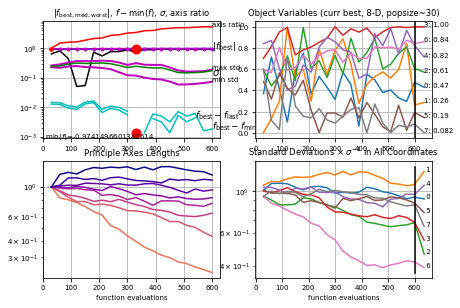

In [17]:
# Initialize CMA-ES
# init_solu = [0.5096467,  0.42816956, 0.26221261, 0.92995329, 0.99500857, 0.16992465, 0.85079334, 0.21497556]
# init_solu = [0.5096467,  0.42816956, 0.26221261, 0.92995329, 0.99500857, 0.16992465]
bounds = [lower_bounds, upper_bounds]
optim = cma.CMAEvolutionStrategy(init_solu, 0.2, {'popsize': 30, 'bounds': bounds})

best_solutions = []
iteration = 20
for round in range(iteration):
    def get_fitness(hyperparameter):
        with tf.Graph().as_default(), tf.Session() as sess:
            hyperparameter['EPOCHS'] = 10
            conv_net = ConvNet(hyperparameter)
            conv_net.build_cnn()
            sess.run(tf.global_variables_initializer())
            # c1_dropout_rate = hyperparameter['c1_dropout_rate']
            # c3_dropout_rate = hyperparameter['c3_dropout_rate']
            c5_dropout_rate = hyperparameter['c5_dropout_rate']
            f6_dropout_rate = hyperparameter['f6_dropout_rate']
            conv_net.train(sess, X_train_norm, y_train, False, None, None, False, save_name='sol_{:0>2d}'.format(idx), dropout=[c5_dropout_rate, f6_dropout_rate])
            # conv_net.train(sess, X_train_extend_norm, y_train_extend, True, X_valid_norm, y_valid, True, save_name='sol_{:0>2d}'.format(idx), dropout=[c5_dropout_rate, f6_dropout_rate])
            
            accuracy, _ = conv_net.evaluate(sess, X_valid_norm, y_valid)
            # print('round: {}, validation accuracy: {:.3f}'.format(round, accuracy))
            return -accuracy

    X = optim.ask() # get candidate solutions
    hyperparameters = [solution2hyperparameter(x) for x in X]
    fitness = [get_fitness(hyper) for hyper in hyperparameters]
    best_idx = fitness.index(min(fitness))
    best_solutions.append(X[best_idx])
    print('round: {}, max fitness: {}'.format(round, -fitness[best_idx]))
    print('best solution: {}'.format(X[best_idx]))
    #  in case do something else that needs to be done
    optim.tell(X, fitness)     # do all the real "update" work
    optim.disp(20)       # display info every 20th iteration
    optim.logger.add()   # log another "data line", non-standard

# final output
# print('termination by', optim.stop())
print('---------------------------------')
print('best f-value =', optim.result[1])
print('best solution =', optim.result[0])
optim.logger.plot()  # if matplotlib is available

# Save solution candidates
save_solutions(best_solutions)

### Training candidate solutions found by CMA-ES

In [18]:
for idx in range(iteration):
    with tf.Graph().as_default(), tf.Session() as sess:
        hyperparameter = solution2hyperparameter(best_solutions[idx])
        hyperparameter['EPOCHS'] = 50
        conv_net = ConvNet(hyperparameter)
        conv_net.build_cnn()
        sess.run(tf.global_variables_initializer())
        c5_dropout_rate = hyperparameter['c5_dropout_rate']
        f6_dropout_rate = hyperparameter['f6_dropout_rate']
        conv_net.train(sess, X_train_extend_norm, y_train_extend, False, None, None, False, save_name='sol_{:0>2d}'.format(idx), dropout=[c5_dropout_rate, f6_dropout_rate])
        # conv_net.train(sess, X_train_extend_norm, y_train_extend, X_valid_norm, y_valid, True, dropout=[c5_dropout_rate, f6_dropout_rate], save_name='sol_{:0>2d}'.format(idx))

        accuracy, _ = conv_net.evaluate(sess, X_test_norm, y_test)
        print("Solution: {}, Test Accuracy = {:.3f}".format(idx, accuracy))

Solution: 0, Test Accuracy = 0.962
Solution: 1, Test Accuracy = 0.969
Solution: 2, Test Accuracy = 0.974
Solution: 3, Test Accuracy = 0.958
Solution: 4, Test Accuracy = 0.974
Solution: 5, Test Accuracy = 0.974
Solution: 6, Test Accuracy = 0.965
Solution: 7, Test Accuracy = 0.972
Solution: 8, Test Accuracy = 0.968
Solution: 9, Test Accuracy = 0.965
Solution: 10, Test Accuracy = 0.979
Solution: 11, Test Accuracy = 0.973
Solution: 12, Test Accuracy = 0.962
Solution: 13, Test Accuracy = 0.967
Solution: 14, Test Accuracy = 0.979
Solution: 15, Test Accuracy = 0.981
Solution: 16, Test Accuracy = 0.979
Solution: 17, Test Accuracy = 0.972
Solution: 18, Test Accuracy = 0.973
Solution: 19, Test Accuracy = 0.967


### Training CNN with the best solutions found by CMA-ES
These candidate solutions were gathered from previous trial. I just save them here so I don't need to run the time-consuming part so many times. I finally choose solutions\[4\], it was the best one I found. Below experiment were all based on this solution.

In [13]:
def get_solutions():
    solutions = []
    # 30/30/20
    solutions.append([0.71501761, 0.66926304, 0.48631953, 0.92333621, 0.99338383, 0.11371466, 0.79284568, 0.5225656])  # 0.9814
    solutions.append([0.82018242, 0.58627204, 0.51444484, 0.79091123, 0.99295336, 0.01254283, 0.71390002, 0.40565213]) # 0.9791
    solutions.append([0.69421321, 0.73319605, 0.31756099, 0.99975817, 0.99763144, 0.04504005, 0.59469371, 0.48274944]) # 0.9757
    solutions.append([0.81273156, 0.43131355, 0.50516998, 0.72890813, 0.91355749, 0.14261663, 0.78364871, 0.51084291]) # 0.9743
    solutions.append([0.5096467,  0.42816956, 0.26221261, 0.92995329, 0.99500857, 0.16992465, 0.85079334, 0.21497556]) # 0.9768
    solutions.append([0.63922167, 0.62235135, 0.59984683, 0.99101209, 0.96693197, 0.19799202, 0.82533619, 0.35919568]) # 0.9764
    solutions.append([0.58860636, 0.80001045, 0.55923315, 0.96426745, 0.92155347, 0.04048686, 0.63504324, 0.51527871]) # 0.9784
    # 20/20/10
    solutions.append([0.76073957, 0.74763466, 0.61332237, 0.97328714, 0.99693619, 0.28862943, 0.75486434, 0.29268678]) # 0.9743
    solutions.append([0.49951675, 0.64748906, 0.47841092, 0.99968259, 0.80554225, 0.19899203, 0.75258769, 0.27599361]) # 0.9743
    solutions.append([0.48414982, 0.60746923, 0.62289401, 0.93579957, 0.97441738, 0.31891282, 0.79062914, 0.43475493]) # 0.9725
    return solutions

def get_model_list():
    model_list = glob.glob(model_path + '*_final_*.data*')
    for i in range(len(model_list)):
        start_idx = model_list[i].find('sol_')
        end_idx = model_list[i].find('.data')
        model_list[i] = model_list[i][start_idx:end_idx]
    model_list = sorted(model_list)
    return model_list

solutions = get_solutions()
model_list = get_model_list()

In [18]:
train_acc_epochs = []
test_acc_epochs = []

### Train solution[4]

It is base model
1. Epochs = 50
2. Learning rate: 0.001
3. Batch size: 128
4. Use batch normalization
5. Use dropout
6. Drapout rate found by CMA-ES
7. Training with extend training data set with gauss noise

Training accuracy: 0.999

Test accuracy: 0.976

Model saved as: model_01_base

In [19]:
iterations = len(solutions)
iterations = 5
for idx in range(4, iterations):
    with tf.Graph().as_default(), tf.Session() as sess:
        hyperparameter = solution2hyperparameter(solutions[idx])
        hyperparameter['EPOCHS'] = 50
        conv_net = ConvNet(hyperparameter)
        conv_net.build_cnn()
        sess.run(tf.global_variables_initializer())
        c5_dropout_rate = hyperparameter['c5_dropout_rate']
        f6_dropout_rate = hyperparameter['f6_dropout_rate']
        # print('Start training {} solution.'.format(idx))
        conv_net.train(sess, X_train_extend_norm, y_train_extend, True, X_test_norm, y_test, True, save_name='model_01_base', dropout=[c5_dropout_rate, f6_dropout_rate])

        train_accuracy, softmax = conv_net.evaluate(sess, X_train_extend_norm, y_train_extend)
        test_accuracy, softmax = conv_net.evaluate(sess, X_test_norm, y_test)
        train_acc_epochs.append(conv_net.train_acc.copy() + [train_accuracy])
        test_acc_epochs.append(conv_net.valid_acc.copy() + [test_accuracy])
        print("Solution: {}, Train Accuracy = {:.3f}".format(idx, train_accuracy))
        print("Solution: {}, Test Accuracy = {:.3f}".format(idx, test_accuracy))

EPOCH 11, Validation Accuracy = 0.970
EPOCH 21, Validation Accuracy = 0.976
EPOCH 31, Validation Accuracy = 0.976
EPOCH 41, Validation Accuracy = 0.977
Model saved as: ../CarND-Traffic-Sign-Classifier-Project/model/model_01_base_final
train accuracy: [0.9867853345539486, 0.9966665708784735, 0.9981362354419051, 0.9984153896047916]
valid accuracy: [0.969992082192609, 0.9760886776758769, 0.9762470308033512, 0.9770387964407226]
Solution: 4, Train Accuracy = 0.999
Solution: 4, Test Accuracy = 0.979


### Train solution[4]
1. Epochs = 50
2. Learning rate: 0.001
3. Batch size: 128
4. No batch normalization
5. Use dropout
6. Drapout rate found by CMA-ES
7. Training with extend training data set with gauss noise

Training accuracy: 0.913

Test accuracy: 0.902

Model saved as: model_02_no_bn

In [20]:
iterations = len(solutions)
iterations = 5
for idx in range(4, iterations):
    with tf.Graph().as_default(), tf.Session() as sess:
        hyperparameter = solution2hyperparameter(solutions[idx])
        hyperparameter['EPOCHS'] = 50
        hyperparameter['use_bn'] = False
        conv_net = ConvNet(hyperparameter)
        conv_net.build_cnn()
        sess.run(tf.global_variables_initializer())
        c5_dropout_rate = hyperparameter['c5_dropout_rate']
        f6_dropout_rate = hyperparameter['f6_dropout_rate']
        # print('Start training {} solution.'.format(idx))
        conv_net.train(sess, X_train_extend_norm, y_train_extend, True, X_test_norm, y_test, True, save_name='model_02_no_bn', dropout=[c5_dropout_rate, f6_dropout_rate])

        train_accuracy, softmax = conv_net.evaluate(sess, X_train_extend_norm, y_train_extend)
        test_accuracy, softmax = conv_net.evaluate(sess, X_test_norm, y_test)
        train_acc_epochs.append(conv_net.train_acc.copy() + [train_accuracy])
        test_acc_epochs.append(conv_net.valid_acc.copy() + [test_accuracy])
        print("Solution: {}, Train Accuracy = {:.3f}".format(idx, train_accuracy))
        print("Solution: {}, Test Accuracy = {:.3f}".format(idx, test_accuracy))

EPOCH 11, Validation Accuracy = 0.836
EPOCH 21, Validation Accuracy = 0.866
EPOCH 31, Validation Accuracy = 0.884
EPOCH 41, Validation Accuracy = 0.892
Model saved as: ../CarND-Traffic-Sign-Classifier-Project/model/model_02_no_bn_final
train accuracy: [0.8274170440039722, 0.8604598654315173, 0.8891593765012115, 0.8987655638711277]
valid accuracy: [0.8361045129036772, 0.8658749009821024, 0.8844022169343461, 0.8917656374374081]
Solution: 4, Train Accuracy = 0.913
Solution: 4, Test Accuracy = 0.902


### Train solution[4]
1. Epochs = 50
2. Learning rate: 0.001
3. Batch size: 128
4. Use batch normalization
5. No dropout
6. Training with extend training data set with gauss noise

Training accuracy: 0.999

Test accuracy: 0.956

Model saved as: model_03_no_dropout

In [21]:
iterations = len(solutions)
iterations = 5
for idx in range(4, iterations):
    with tf.Graph().as_default(), tf.Session() as sess:
        hyperparameter = solution2hyperparameter(solutions[idx])
        hyperparameter['EPOCHS'] = 50
        hyperparameter['use_dropout'] = False
        conv_net = ConvNet(hyperparameter)
        conv_net.build_cnn()
        sess.run(tf.global_variables_initializer())
        c5_dropout_rate = hyperparameter['c5_dropout_rate']
        f6_dropout_rate = hyperparameter['f6_dropout_rate']
        # print('Start training {} solution.'.format(idx))
        conv_net.train(sess, X_train_extend_norm, y_train_extend, True, X_test_norm, y_test, True, save_name='model_03_no_dropout', dropout=[c5_dropout_rate, f6_dropout_rate])

        train_accuracy, softmax = conv_net.evaluate(sess, X_train_extend_norm, y_train_extend)
        test_accuracy, softmax = conv_net.evaluate(sess, X_test_norm, y_test)
        train_acc_epochs.append(conv_net.train_acc.copy() + [train_accuracy])
        test_acc_epochs.append(conv_net.valid_acc.copy() + [test_accuracy])
        print("Solution: {}, Train Accuracy = {:.3f}".format(idx, train_accuracy))
        print("Solution: {}, Test Accuracy = {:.3f}".format(idx, test_accuracy))

EPOCH 11, Validation Accuracy = 0.922
EPOCH 21, Validation Accuracy = 0.951
EPOCH 31, Validation Accuracy = 0.951
EPOCH 41, Validation Accuracy = 0.947
Model saved as: ../CarND-Traffic-Sign-Classifier-Project/model/model_03_no_dropout_final
train accuracy: [0.9921795782309015, 0.9977175041975754, 0.99898190834712, 0.9979597114859622]
valid accuracy: [0.922248614400696, 0.9512272365869082, 0.9506730009333444, 0.9467933492347161]
Solution: 4, Train Accuracy = 0.999
Solution: 4, Test Accuracy = 0.956


### Train solution[4]
1. Epochs = 50
2. Learning rate: 0.001
3. Batch size: 128
4. Use batch normalization
5. Use dropout
6. Fix drapout rate: 0.5
7. Training with extend training data set with gauss noise

Training accuracy: 0.999

Test accuracy: 0.972

Model saved as: model_04_dropout05

In [22]:
iterations = len(solutions)
iterations = 5
for idx in range(4, iterations):
    with tf.Graph().as_default(), tf.Session() as sess:
        hyperparameter = solution2hyperparameter(solutions[idx])
        hyperparameter['EPOCHS'] = 50
        conv_net = ConvNet(hyperparameter)
        conv_net.build_cnn()
        sess.run(tf.global_variables_initializer())
        # c5_dropout_rate = hyperparameter['c5_dropout_rate']
        # f6_dropout_rate = hyperparameter['f6_dropout_rate']
        c5_dropout_rate = 0.5
        f6_dropout_rate = 0.5
        # print('Start training {} solution.'.format(idx))
        conv_net.train(sess, X_train_extend_norm, y_train_extend, True, X_test_norm, y_test, True, save_name='model_04_dropout05', dropout=[c5_dropout_rate, f6_dropout_rate])

        train_accuracy, softmax = conv_net.evaluate(sess, X_train_extend_norm, y_train_extend)
        test_accuracy, softmax = conv_net.evaluate(sess, X_test_norm, y_test)
        train_acc_epochs.append(conv_net.train_acc.copy() + [train_accuracy])
        test_acc_epochs.append(conv_net.valid_acc.copy() + [test_accuracy])
        print("Solution: {}, Train Accuracy = {:.3f}".format(idx, train_accuracy))
        print("Solution: {}, Test Accuracy = {:.3f}".format(idx, test_accuracy))

EPOCH 11, Validation Accuracy = 0.969
EPOCH 21, Validation Accuracy = 0.972
EPOCH 31, Validation Accuracy = 0.974
EPOCH 41, Validation Accuracy = 0.975
Model saved as: ../CarND-Traffic-Sign-Classifier-Project/model/model_04_dropout05_final
train accuracy: [0.99847286252068, 0.999474533340449, 0.9996921093791693, 0.999839896877168]
valid accuracy: [0.9687252571728149, 0.972209026015003, 0.9743467932359057, 0.9750593823472942]
Solution: 4, Train Accuracy = 0.999
Solution: 4, Test Accuracy = 0.972


### Train solution[4]
1. Epochs = 50
2. Learning rate: 0.001
3. Batch size: 256
4. Use batch normalization
5. Use dropout
6. Drapout rate found by CMA-ES
7. Training with extend training data set with gauss noise

Training accuracy: 0.999

Test accuracy: 0.976

Model saved as: model_05_batch256

In [23]:
iterations = len(solutions)
iterations = 5
for idx in range(4, iterations):
    with tf.Graph().as_default(), tf.Session() as sess:
        hyperparameter = solution2hyperparameter(solutions[idx])
        hyperparameter['EPOCHS'] = 50
        hyperparameter['BATCH_SIZE'] = 256
        conv_net = ConvNet(hyperparameter)
        conv_net.build_cnn()
        sess.run(tf.global_variables_initializer())
        c5_dropout_rate = hyperparameter['c5_dropout_rate']
        f6_dropout_rate = hyperparameter['f6_dropout_rate']
        # print('Start training {} solution.'.format(idx))
        conv_net.train(sess, X_train_extend_norm, y_train_extend, True, X_test_norm, y_test, True, save_name='model_05_batch256', dropout=[c5_dropout_rate, f6_dropout_rate])

        train_accuracy, softmax = conv_net.evaluate(sess, X_train_extend_norm, y_train_extend)
        test_accuracy, softmax = conv_net.evaluate(sess, X_test_norm, y_test)
        train_acc_epochs.append(conv_net.train_acc.copy() + [train_accuracy])
        test_acc_epochs.append(conv_net.valid_acc.copy() + [test_accuracy])
        print("Solution: {}, Train Accuracy = {:.3f}".format(idx, train_accuracy))
        print("Solution: {}, Test Accuracy = {:.3f}".format(idx, test_accuracy))

EPOCH 11, Validation Accuracy = 0.965
EPOCH 21, Validation Accuracy = 0.971
EPOCH 31, Validation Accuracy = 0.975
EPOCH 41, Validation Accuracy = 0.976
Model saved as: ../CarND-Traffic-Sign-Classifier-Project/model/model_05_batch256_final
train accuracy: [0.9901475001432068, 0.9945318625884844, 0.9947124917382684, 0.9987807531415106]
valid accuracy: [0.9653998414581009, 0.9708630243559632, 0.9745843230026258, 0.9759303245106483]
Solution: 4, Train Accuracy = 0.999
Solution: 4, Test Accuracy = 0.976


### Train solution[4]
1. Epochs = 50
2. Learning rate: 0.003
3. Batch size: 128
4. Use batch normalization
5. Use dropout
6. Drapout rate found by CMA-ES
7. Training with extend training data set with gauss noise

Training accuracy: 0.998

Test accuracy: 0.973

Model saved as: model_06_lr003

In [24]:
iterations = len(solutions)
iterations = 5
for idx in range(4, iterations):
    with tf.Graph().as_default(), tf.Session() as sess:
        hyperparameter = solution2hyperparameter(solutions[idx])
        hyperparameter['EPOCHS'] = 50
        hyperparameter['RATE'] = 0.003
        conv_net = ConvNet(hyperparameter)
        conv_net.build_cnn()
        sess.run(tf.global_variables_initializer())
        c5_dropout_rate = hyperparameter['c5_dropout_rate']
        f6_dropout_rate = hyperparameter['f6_dropout_rate']
        print('Start training {} solution.'.format(idx))
        conv_net.train(sess, X_train_extend_norm, y_train_extend, True, X_test_norm, y_test, True, save_name='model_06_lr003', dropout=[c5_dropout_rate, f6_dropout_rate])

        train_accuracy, softmax = conv_net.evaluate(sess, X_train_extend_norm, y_train_extend)
        test_accuracy, softmax = conv_net.evaluate(sess, X_test_norm, y_test)
        train_acc_epochs.append(conv_net.train_acc.copy() + [train_accuracy])
        test_acc_epochs.append(conv_net.valid_acc.copy() + [test_accuracy])
        print("Solution: {}, Train Accuracy = {:.3f}".format(idx, train_accuracy))
        print("Solution: {}, Test Accuracy = {:.3f}".format(idx, test_accuracy))

Start training 4 solution.
EPOCH 11, Validation Accuracy = 0.971
EPOCH 21, Validation Accuracy = 0.974
EPOCH 31, Validation Accuracy = 0.971
EPOCH 41, Validation Accuracy = 0.973
Model saved as: ../CarND-Traffic-Sign-Classifier-Project/model/model_06_lr003_final
train accuracy: [0.9928815688463954, 0.9959358438050354, 0.9973192989946345, 0.9975245594085216]
valid accuracy: [0.9708630243937174, 0.9743467932359057, 0.9709422009952089, 0.9730799682538659]
Solution: 4, Train Accuracy = 0.998
Solution: 4, Test Accuracy = 0.973


### Train solution[4]
1. Epochs = 50
2. Learning rate: 0.001
3. Batch size: 128
4. Use batch normalization
5. Use dropout
6. Drapout rate found by CMA-ES
7. Training with original training data set with gauss noise

Training accuracy: 1.000

Test accuracy: 0.967

Model saved as: model_07_origin_noise

In [25]:
iterations = len(solutions)
iterations = 5
for idx in range(4, iterations):
    with tf.Graph().as_default(), tf.Session() as sess:
        hyperparameter = solution2hyperparameter(solutions[idx])
        hyperparameter['EPOCHS'] = 50
        conv_net = ConvNet(hyperparameter)
        conv_net.build_cnn()
        sess.run(tf.global_variables_initializer())
        c5_dropout_rate = hyperparameter['c5_dropout_rate']
        f6_dropout_rate = hyperparameter['f6_dropout_rate']
        # print('Start training {} solution.'.format(idx))
        conv_net.train(sess, X_train_norm, y_train, True, X_test_norm, y_test, True, save_name='model_07_origin_noise', dropout=[c5_dropout_rate, f6_dropout_rate])

        train_accuracy, softmax = conv_net.evaluate(sess, X_train_norm, y_train)
        test_accuracy, softmax = conv_net.evaluate(sess, X_test_norm, y_test)
        train_acc_epochs.append(conv_net.train_acc.copy() + [train_accuracy])
        test_acc_epochs.append(conv_net.valid_acc.copy() + [test_accuracy])
        print("Solution: {}, Train Accuracy = {:.3f}".format(idx, train_accuracy))
        print("Solution: {}, Test Accuracy = {:.3f}".format(idx, test_accuracy))

EPOCH 11, Validation Accuracy = 0.956
EPOCH 21, Validation Accuracy = 0.958
EPOCH 31, Validation Accuracy = 0.964
EPOCH 41, Validation Accuracy = 0.967
Model saved as: ../CarND-Traffic-Sign-Classifier-Project/model/model_07_origin_noise_final
train accuracy: [0.9930170407366892, 0.9978735021121297, 0.9993103250093394, 0.9997413718785022]
valid accuracy: [0.9555819475924506, 0.9583531273232503, 0.9641330164760611, 0.9671417258603179]
Solution: 4, Train Accuracy = 1.000
Solution: 4, Test Accuracy = 0.967


### Train solution[4]
1. Epochs = 50
2. Learning rate: 0.001
3. Batch size: 128
4. Use batch normalization
5. Use dropout
6. Drapout rate found by CMA-ES
7. Training with original training data set without gauss noise

Training accuracy: 1.000

Test accuracy: 0.972

Model saved as: model_08_origin_no_noise

In [26]:
iterations = len(solutions)
iterations = 5
for idx in range(4, iterations):
    with tf.Graph().as_default(), tf.Session() as sess:
        hyperparameter = solution2hyperparameter(solutions[idx])
        hyperparameter['EPOCHS'] = 50
        conv_net = ConvNet(hyperparameter)
        conv_net.build_cnn()
        sess.run(tf.global_variables_initializer())
        c5_dropout_rate = hyperparameter['c5_dropout_rate']
        f6_dropout_rate = hyperparameter['f6_dropout_rate']
        # print('Start training {} solution.'.format(idx))
        conv_net.train(sess, X_train_no_noise_norm, y_train, True, X_test_norm, y_test, True, save_name='model_08_origin_no_noise', dropout=[c5_dropout_rate, f6_dropout_rate])

        train_accuracy, softmax = conv_net.evaluate(sess, X_train_no_noise_norm, y_train)
        test_accuracy, softmax = conv_net.evaluate(sess, X_test_norm, y_test)
        train_acc_epochs.append(conv_net.train_acc.copy() + [train_accuracy])
        test_acc_epochs.append(conv_net.valid_acc.copy() + [test_accuracy])
        print("Solution: {}, Train Accuracy = {:.3f}".format(idx, train_accuracy))
        print("Solution: {}, Test Accuracy = {:.3f}".format(idx, test_accuracy))

EPOCH 11, Validation Accuracy = 0.954
EPOCH 21, Validation Accuracy = 0.965
EPOCH 31, Validation Accuracy = 0.964
EPOCH 41, Validation Accuracy = 0.968
Model saved as: ../CarND-Traffic-Sign-Classifier-Project/model/model_08_origin_no_noise_final
train accuracy: [0.9947124917553966, 0.9990804333629141, 0.9994827437570045, 0.9997126354205581]
valid accuracy: [0.9535233572656355, 0.9648456055496952, 0.9640538398745696, 0.9683293744296378]
Solution: 4, Train Accuracy = 1.000
Solution: 4, Test Accuracy = 0.972


### Train solution[4]
1. Epochs = 50
2. Learning rate: 0.001
3. Batch size: 128
4. Use batch normalization
5. Use dropout
6. Drapout rate found by CMA-ES
7. Training with extended training data set without gauss noise

Training accuracy: 0.999

Test accuracy: 0.972

Model saved as: model_09_extend_no_noise

In [27]:
iterations = len(solutions)
iterations = 5
for idx in range(4, iterations):
    with tf.Graph().as_default(), tf.Session() as sess:
        hyperparameter = solution2hyperparameter(solutions[idx])
        hyperparameter['EPOCHS'] = 50
        conv_net = ConvNet(hyperparameter)
        conv_net.build_cnn()
        sess.run(tf.global_variables_initializer())
        c5_dropout_rate = hyperparameter['c5_dropout_rate']
        f6_dropout_rate = hyperparameter['f6_dropout_rate']
        # print('Start training {} solution.'.format(idx))
        conv_net.train(sess, X_train_extend_no_noise_norm, y_train_extend, True, X_test_norm, y_test, True, save_name='model_09_extend_no_noise', dropout=[c5_dropout_rate, f6_dropout_rate])

        train_accuracy, softmax = conv_net.evaluate(sess, X_train_extend_no_noise_norm, y_train_extend)
        test_accuracy, softmax = conv_net.evaluate(sess, X_test_norm, y_test)
        train_acc_epochs.append(conv_net.train_acc.copy() + [train_accuracy])
        test_acc_epochs.append(conv_net.valid_acc.copy() + [test_accuracy])
        print("Solution: {}, Train Accuracy = {:.3f}".format(idx, train_accuracy))
        print("Solution: {}, Test Accuracy = {:.3f}".format(idx, test_accuracy))

EPOCH 11, Validation Accuracy = 0.969
EPOCH 21, Validation Accuracy = 0.976
EPOCH 31, Validation Accuracy = 0.978
EPOCH 41, Validation Accuracy = 0.980
Model saved as: ../CarND-Traffic-Sign-Classifier-Project/model/model_09_extend_no_noise_final
train accuracy: [0.9951969063150419, 0.9980705521094613, 0.9993062198010616, 0.9996469520881142]
valid accuracy: [0.9689627869017806, 0.9764053839308254, 0.9776722089506196, 0.9803642121176822]
Solution: 4, Train Accuracy = 0.999
Solution: 4, Test Accuracy = 0.972


### Show diagram

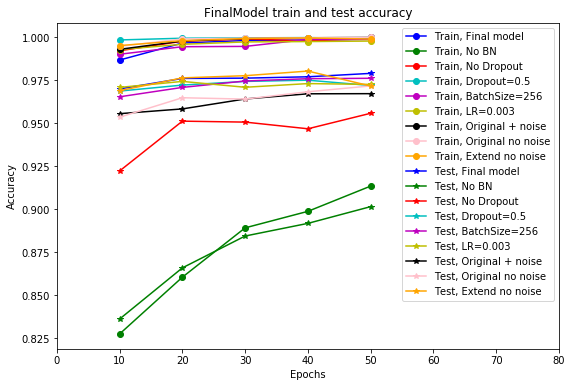

In [33]:
# train_acc_epochs = []
# test_acc_epochs = []
# print('train_acc_epochs: {}'.format(train_acc_epochs))
# print('test_acc_epochs: {}'.format(test_acc_epochs))
# with open(project_path + 'FinalModelTrainAcc.pkl', 'wb') as f:
#     pickle.dump(train_acc_epochs, f)
# with open(project_path + 'FinalModelTestAcc.pkl', 'wb') as f:
#     pickle.dump(test_acc_epochs, f)

f = plt.figure(figsize=(9, 6))

x = np.arange(1, len(test_acc_epochs[0]) + 1) * 10
y1 = np.array(train_acc_epochs[0])
y2 = np.array(train_acc_epochs[1])
y3 = np.array(train_acc_epochs[2])
y4 = np.array(train_acc_epochs[3])
y5 = np.array(train_acc_epochs[4])
y6 = np.array(train_acc_epochs[5])
y7 = np.array(train_acc_epochs[6])
y8 = np.array(train_acc_epochs[7])
y9 = np.array(train_acc_epochs[8])

plt.plot(x, y1, 'bo-', label='Train, Final model')
plt.plot(x, y2, 'go-', label='Train, No BN')
plt.plot(x, y3, 'ro-', label='Train, No Dropout')
plt.plot(x, y4, 'co-', label='Train, Dropout=0.5')
plt.plot(x, y5, 'mo-', label='Train, BatchSize=256')
plt.plot(x, y6, 'yo-', label='Train, LR=0.003')
plt.plot(x, y7, 'ko-', label='Train, Original + noise')
plt.plot(x, y8, 'o-', color='pink', label='Train, Original no noise')
plt.plot(x, y9, 'o-', color='orange', label='Train, Extend no noise')

y1 = np.array(test_acc_epochs[0])
y2 = np.array(test_acc_epochs[1])
y3 = np.array(test_acc_epochs[2])
y4 = np.array(test_acc_epochs[3])
y5 = np.array(test_acc_epochs[4])
y6 = np.array(test_acc_epochs[5])
y7 = np.array(test_acc_epochs[6])
y8 = np.array(test_acc_epochs[7])
y9 = np.array(test_acc_epochs[8])
plt.plot(x, y1, 'b*-', label='Test, Final model')
plt.plot(x, y2, 'g*-', label='Test, No BN')
plt.plot(x, y3, 'r*-', label='Test, No Dropout')
plt.plot(x, y4, 'c*-', label='Test, Dropout=0.5')
plt.plot(x, y5, 'm*-', label='Test, BatchSize=256')
plt.plot(x, y6, 'y*-', label='Test, LR=0.003')
plt.plot(x, y7, 'k*-', label='Test, Original + noise')
plt.plot(x, y8, '*-', color='pink', label='Test, Original no noise')
plt.plot(x, y9, '*-', color='orange', label='Test, Extend no noise')

plt.title('FinalModel train and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0, 80)
# plt.ylim(0.75, 1.03)
plt.legend()
plt.show()
plt.close()

### Load the previously trained model and verify its accuracy

In [15]:
best_model = 'model_01_base_final'
class_accuracy = []
class_fail_case = []
class_distribution = []
for id in range(n_classes):
    class_distribution.append(len(class_id[id]) / len(y_train))

sol_idx = 4
with tf.Graph().as_default(), tf.Session() as sess:
    hyperparameter = solution2hyperparameter(solutions[sol_idx])
    hyperparameter['EPOCHS'] = 20
    conv_net = ConvNet(hyperparameter)
    conv_net.build_cnn()
    sess.run(tf.global_variables_initializer())
    c5_dropout_rate = hyperparameter['c5_dropout_rate']
    f6_dropout_rate = hyperparameter['f6_dropout_rate']
    conv_net.load_weights(sess, best_model)
    
    test_accuracy, softmax = conv_net.evaluate(sess, X_test_norm, y_test)
    top_1 = sess.run(tf.nn.top_k(softmax, k=1))
    print("Total test Accuracy = {:.3f}".format(test_accuracy))
    for id in range(n_classes):
        idx = np.where(y_test == id)
        accuracy, softmax = conv_net.evaluate(sess, X_test_norm[idx], y_test[idx])
        class_accuracy.append(accuracy)
        # print("class {}, ration: {:.3f}%, accuracy = {:.3f}".format(id, class_distribution[id] * 100, accuracy))
        
        # Collect the fail images accroading to each class
        fail_idx = np.where((y_test != top_1.indices[:,0]) & (y_test == id))[0]
        class_fail_case.append(fail_idx)

load model from: ./model/model_01_base_final
INFO:tensorflow:Restoring parameters from ./model/model_01_base_final
Total test Accuracy = 0.979


### Show the accuracy of each class
 

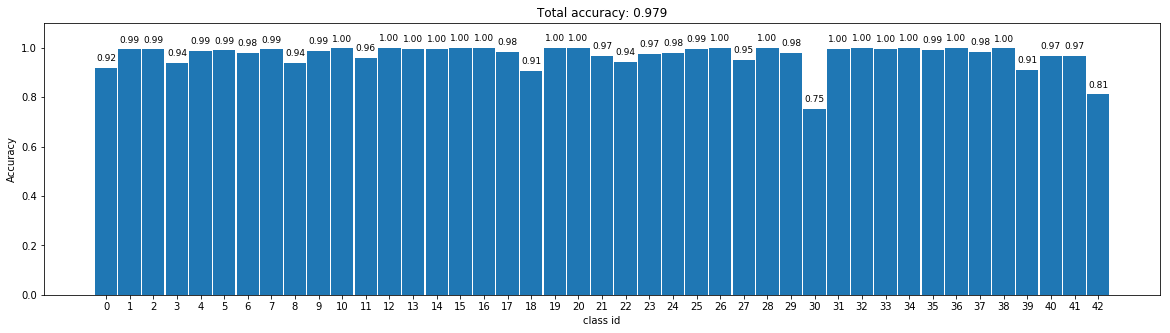

In [39]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

x_label = []
for id in range(n_classes):
    x_label.append(str(id))
fig = plt.figure(1, figsize=(20, 5))
rects = plt.bar(x_label, class_accuracy, align="center", width=0.95)
autolabel(rects)
plt.title("Total accuracy: {:.3f}".format(test_accuracy))
plt.xlabel("class id")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
plt.show()
plt.close()

### Random choose 5 fail images in each class, show them 

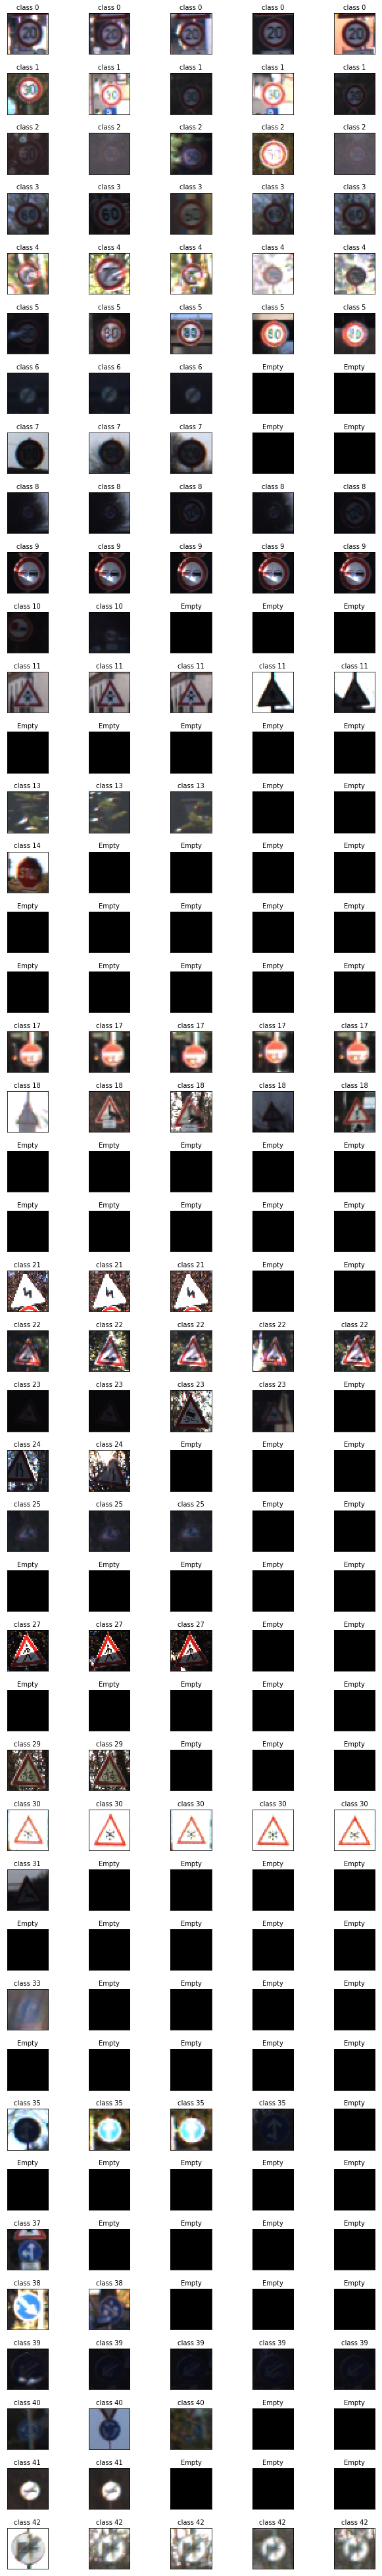

In [52]:
id = 0
f, axis = plt.subplots(n_classes, 5, figsize=(8, 60))
f.tight_layout()
empty_img = np.zeros(shape=image_shape)
for row in range(n_classes):
    fail_idx = class_fail_case[row]
    fail_idx = shuffle(class_fail_case[row])
    for col in range(5):
        if col < fail_idx.shape[0]:
            axis[row][col].set_title('class {}'.format(row), fontsize=10)
            axis[row][col].imshow(X_test[fail_idx[col]])
        else:
            axis[row][col].set_title('Empty', fontsize=10)
            axis[row][col].imshow(empty_img)
        
        axis[row][col].get_xaxis().set_visible(False)
        axis[row][col].get_yaxis().set_visible(False)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()
plt.close()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [57]:
### Load the images and plot them here.
test_imgs_list = glob.glob(image_path + '*')
test_imgs_list = sorted(test_imgs_list)
X_test_imgs = np.zeros((len(test_imgs_list),) + image_shape)
y_test_imgs = np.zeros((len(test_imgs_list),))
gray_test_imgs = np.zeros((len(test_imgs_list),) + (image_shape[0], image_shape[1]))

key_word = 'class_id_'
interpolations = []
interpolations.append(cv2.INTER_NEAREST)
interpolations.append(cv2.INTER_LINEAR)
interpolations.append(cv2.INTER_AREA)
interpolations.append(cv2.INTER_CUBIC)
interpolations.append(cv2.INTER_LANCZOS4)
for i in range(len(test_imgs_list)):
    fname = test_imgs_list[i]
    key_word_idx = fname.find('class_id_') + len('class_id_')
    y_test_imgs[i] = int(fname[key_word_idx:key_word_idx+2])
    y_test_imgs = y_test_imgs.astype(np.uint8)
    # print('fname: {}, id: {}, type: {}'.format(fname, y_test_imgs[i], type(y_test_imgs[i])))
    img = mpimg.imread(fname)
    img = img[:,:,:3]
    if type(img[0, 0, 0]) == np.float32 and np.max(img) <= 1.0:
        img = img * 255
    img = img.astype(np.float32)
    resize_img = cv2.resize(img, (image_shape[0], image_shape[1]), interpolation=interpolations[2])
    
    gray_img = cv2.cvtColor(resize_img, cv2.COLOR_RGB2YUV)[:,:,0]
    X_test_imgs[i] = resize_img[:,:,:3]
    X_test_imgs = X_test_imgs.astype(np.float32)
    gray_test_imgs[i] = gray_img
X_test_imgs_norm = yuv_gray_norm(X_test_imgs, add_noise=False)

load model from: ../CarND-Traffic-Sign-Classifier-Project/model/model_01_base_final
INFO:tensorflow:Restoring parameters from ../CarND-Traffic-Sign-Classifier-Project/model/model_01_base_final
Test Accuracy = 0.850


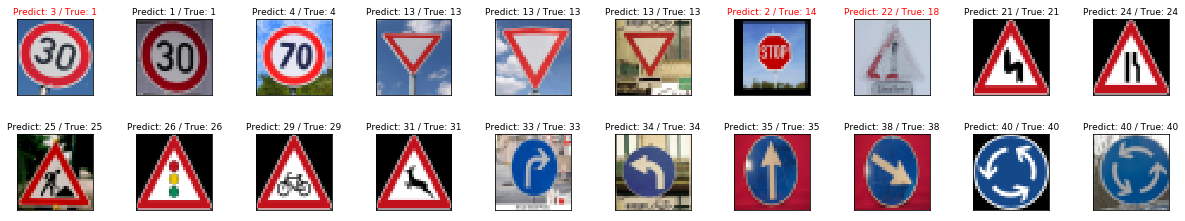

In [58]:
f, axis = plt.subplots(2, 10, figsize=(16, 3))
f.tight_layout()

with tf.Graph().as_default(), tf.Session() as sess:
    hyperparameter = solution2hyperparameter(solutions[sol_idx])
    hyperparameter['EPOCHS'] = 20
    hyperparameter['use_bn'] = True
    conv_net = ConvNet(hyperparameter)
    conv_net.build_cnn()
    sess.run(tf.global_variables_initializer())
    c5_dropout_rate = hyperparameter['c5_dropout_rate']
    f6_dropout_rate = hyperparameter['f6_dropout_rate']
    # conv_net.load_weights(sess, model_list[sol_idx])
    conv_net.load_weights(sess, best_model)
    
    test_accuracy, softmax = conv_net.evaluate(sess, X_test_imgs_norm, y_test_imgs)
    top_1 = sess.run(tf.nn.top_k(softmax, k=1))
    top_5 = sess.run(tf.nn.top_k(softmax, k=5))
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    idx = 0
    for row in range(2):
        for col in range(10):
            img = X_test_imgs[idx].astype(np.uint8)
            y_gray = gray_test_imgs[idx]
            axis[row][col].imshow(img)
            axis[row][col].get_xaxis().set_visible(False)
            axis[row][col].get_yaxis().set_visible(False)
            # axis[row*2+1][col].imshow(y_gray, cmap='gray')
            # axis[row*2+1][col].get_xaxis().set_visible(False)
            # axis[row*2+1][col].get_yaxis().set_visible(False)
            color = 'black' if top_1.indices[idx][0] == y_test_imgs[idx] else 'red'
            axis[row][col].set_title('Predict: {} / True: {}'.format(top_1.indices[idx][0], y_test_imgs[idx]), fontsize=9, color=color)
            idx += 1

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()
plt.close()

### Predict the Sign Type for Each Image

In [0]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [0]:
### Calculate the accuracy for these 5 new images.
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

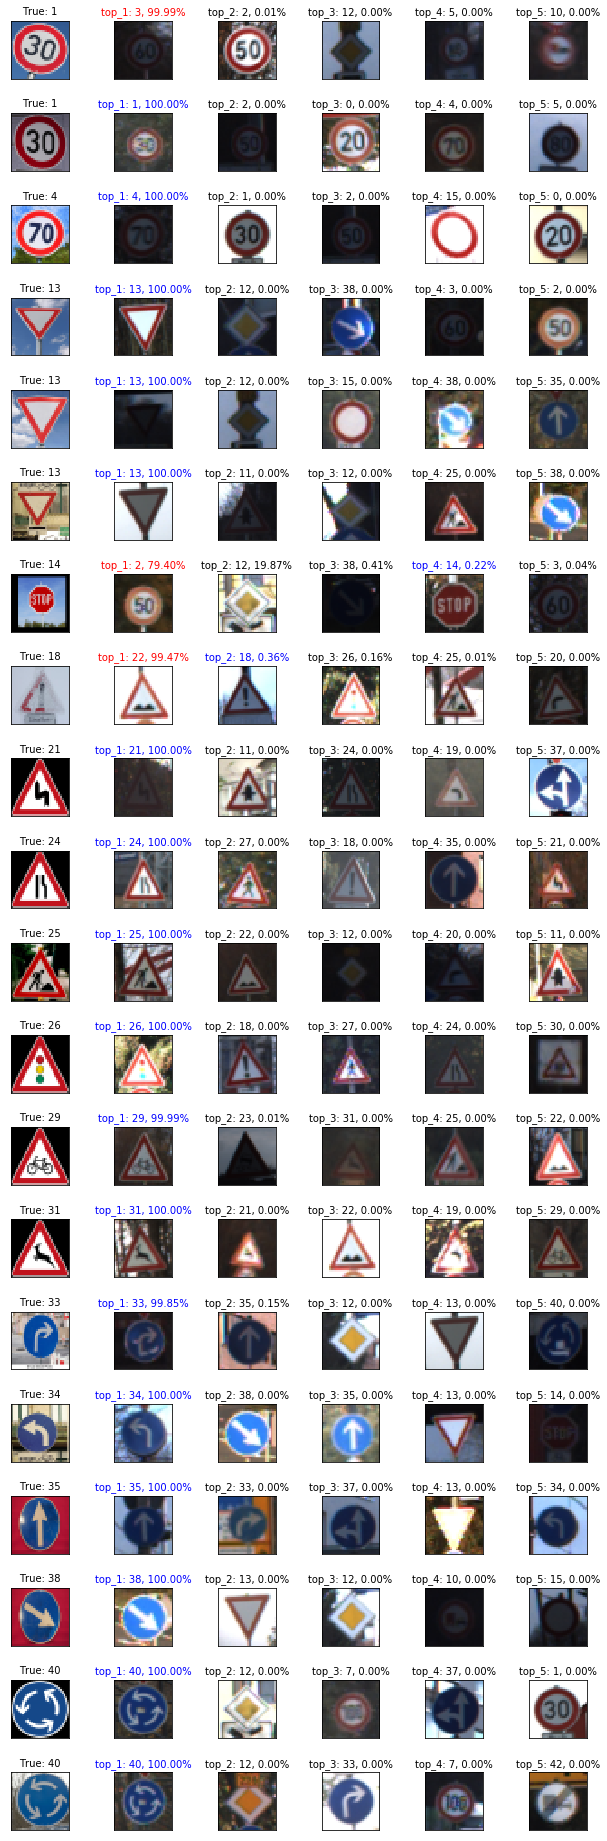

In [59]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
id = 0
f, axis = plt.subplots(20, 6, figsize=(8, 28))
f.tight_layout()
fontsize = 10
for row in range(20):
    img = X_test_imgs[row].astype(np.uint8)
    axis[row][0].imshow(img)
    axis[row][0].set_title('True: {}'.format(y_test_imgs[row]), fontsize=fontsize)
    axis[row][0].get_xaxis().set_visible(False)
    axis[row][0].get_yaxis().set_visible(False)
    for col in range(1, 6):
        idx = class_id[top_5.indices[row][col-1]][np.random.randint(0, len(class_id[id]))]
        # y_gray = cv2.cvtColor(X_train[idx], cv2.COLOR_RGB2YUV)[:,:,0]
        color = 'black'
        if col == 1:
            color = 'blue' if y_test_imgs[row] == top_5.indices[row][0] else 'red'
        else:
            color = 'blue' if y_test_imgs[row] == top_5.indices[row][col-1] else 'black'
        axis[row][col].imshow(X_train[idx])
        axis[row][col].set_title('top_{}: {}, {:3.2f}%'.format(col, top_5.indices[row][col-1], top_5.values[row][col-1]*100), fontsize=fontsize, color=color)
        axis[row][col].get_xaxis().set_visible(False)
        axis[row][col].get_yaxis().set_visible(False)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()
plt.close()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [53]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(cnn, image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={cnn.x: image_input, cnn.on_training: False})
    featuremaps = activation.shape[3]
    row_size = featuremaps / 10 if featuremaps % 10 == 0 else featuremaps / 10 + 1
    col_size = 10
    # plt.figure(plt_num, figsize=(18, 22))
    plt.figure(plt_num, figsize=(20, int(row_size * 2.5) + 1))
    for featuremap in range(featuremaps):
        
        plt.subplot(row_size, col_size, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap] * 255.0, interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap] * 255.0, interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap] * 255.0, interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap] * 255.0, interpolation="nearest", cmap="gray")
    plt.show()
    plt.close()

load model from: ../CarND-Traffic-Sign-Classifier-Project/model/model_01_base_final
INFO:tensorflow:Restoring parameters from ../CarND-Traffic-Sign-Classifier-Project/model/model_01_base_final


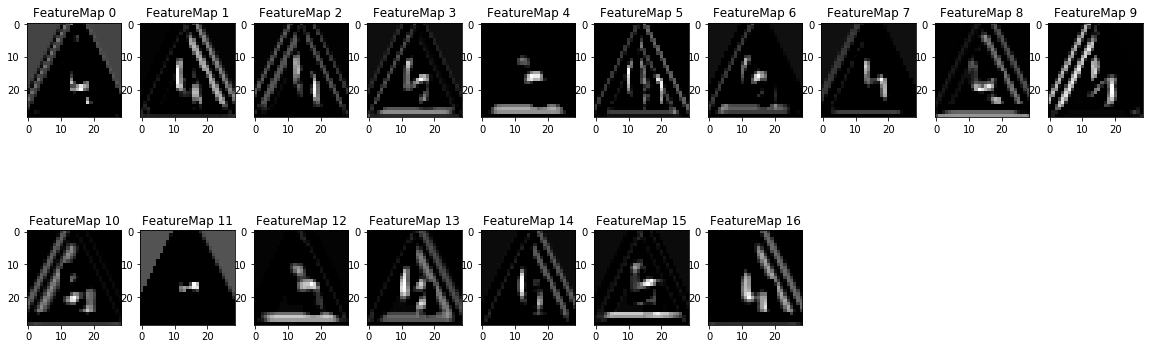

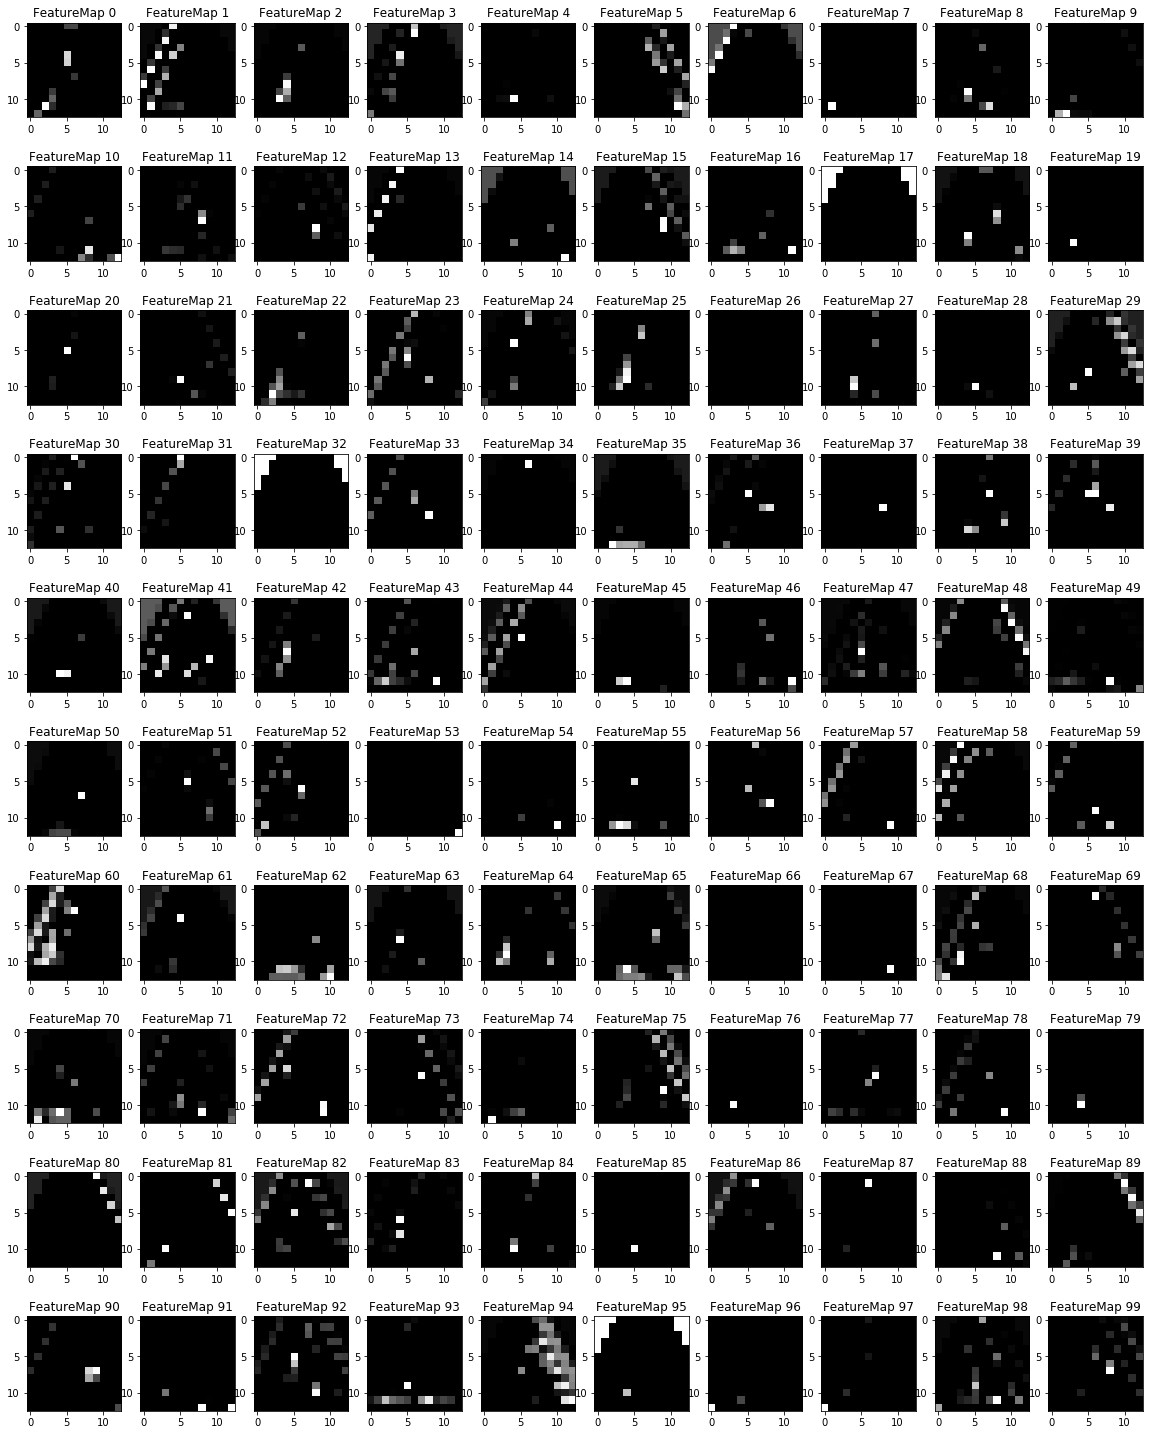

In [61]:
sol_idx = 4
with tf.Graph().as_default(), tf.Session() as sess:
    hyperparameter = solution2hyperparameter(solutions[sol_idx])
    hyperparameter['EPOCHS'] = 20
    hyperparameter['use_bn'] = True
    # print('c1 depth: {}'.format(hyperparameter['c1_depth']))
    # print('c3 depth: {}'.format(hyperparameter['c3_depth']))
    conv_net = ConvNet(hyperparameter)
    c1, c3 = conv_net.build_cnn()
    sess.run(tf.global_variables_initializer())
    c5_dropout_rate = hyperparameter['c5_dropout_rate']
    f6_dropout_rate = hyperparameter['f6_dropout_rate']
    # conv_net.load_weights(sess, model_list[sol_idx])
    conv_net.load_weights(sess, best_model)
    
    idx = 8
    # plt.title('Feature map in c1 layer')
    outputFeatureMap(conv_net, X_test_imgs_norm[idx:idx+1], tf_activation=c1, activation_min=-1, activation_max=-1 ,plt_num=1)
    # plt.title('Feature map in c3 layer')
    outputFeatureMap(conv_net, X_test_imgs_norm[idx:idx+1], tf_activation=c3, activation_min=-1, activation_max=-1 ,plt_num=1)
    # idx = 10878
    # outputFeatureMap(conv_net, X_test_norm[idx:idx+1], tf_activation=c1, activation_min=-1, activation_max=-1 ,plt_num=1)
    # outputFeatureMap(conv_net, X_test_norm[idx:idx+1], tf_activation=c3, activation_min=-1, activation_max=-1 ,plt_num=1)